## Figures 2 and 3

In [371]:
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [372]:
results_dir = "../results/"
out_dir = f"{results_dir}synthetic/"

## Figure 3: random HG and SC

In [373]:
Hs = dict()

N = 100
n_rep = 100
rescale = True # per node

# randomHG
density = 50

Hs_i = []
for i in tqdm(range(n_rep)):
    # print(density * ps)
    # H = xgi.random_hypergraph(N, density * ps)
    H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
    # print(H)
    Hs_i.append(H)
Hs["RHG"] = Hs_i

# random SC
Hs_i = []
for i in tqdm(range(n_rep)):
    H = xgi.read_edgelist(f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
    Hs_i.append(H)
Hs["RSC"] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.14it/s]


In [374]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for kind, Hs_i in Hs.items():

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for H0 in tqdm(Hs_i):

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)
        
        #inverse_rescaling_factors = [max(orders) / d for d in orders]
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        #suffix = "rescaling_present_orders"
        Ds_H, lZs_H = optimization(
            H0,
            tau_c,
            rescaling_factors=inverse_rescaling_factors,
            rescale_per_node=rescale,
        )

        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)

    info_losses[kind] = info_losses_i
    complexities[kind] = complexities_i
    orders_arr[kind] = orders_arr_i
    message_lengths[kind] = message_lengths_i

labels = [f"{i}" for i in kind]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:34,  2.88it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 26.64it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
  9%|███▊                                       | 9/100 [00:03<00:33,  2.73it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00,  8.74it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 27%|███████████▎                              | 27/100 [00:08<00:18,  3.90it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 28%|███████████▊                              | 28/100 [00:08<00:19,  3.77it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 37%|███████████████▌                          | 37/100 [00:10<00:14,  4.24it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 38%|███████████████▉                          | 38/100 [00:11<00:14,  4.23it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 46%|███████████████████▎                      | 46/100 [00:13<00:15,  3.43it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.06it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 47%|███████████████████▋                      | 47/100 [00:13<00:16,  3.26it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w


 56%|███████████████████████▌                  | 56/100 [00:16<00:11,  3.75it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 57%|███████████████████████▉                  | 57/100 [00:16<00:11,  3.71it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 66%|███████████████████████████▋              | 66/100 [00:18<00:09,  3.74it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 27.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 67%|████████████████████████████▏             | 67/100 [00:19<00:09,  3.56it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 85%|███████████████████████████████████▋      | 85/100 [00:23<00:03,  3.95it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                     | 0/4 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 50%|██████████████████████▌                      | 2/4 [00:00<00:00,  5.93it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 95%|███████████████████████████████████████▉  | 95/100 [00:26<00:01,  2.71it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 28.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 

  3%|█▎                                         | 3/100 [00:01<00:39,  2.48it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 26.48it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
  4%|█▋                                         | 4/100 [00:01<00:36,  2.62it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w

 21%|████████▊                                 | 21/100 [00:09<00:39,  2.01it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00,  9.87it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 22%|█████████▏                                | 22/100 [00:10<00:46,  1.66it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w


 50%|██████████████████████▌                      | 2/4 [00:00<00:00, 15.85it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 39%|████████████████▍                         | 39/100 [00:20<00:31,  1.92it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 29.86it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
 


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 17.14it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 57%|███████████████████████▉                  | 57/100 [00:29<00:22,  1.95it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 10.79it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.69it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 66%|███████████████████████████▋              | 66/100 [00:33<00:16,  2.09it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 50%|██████████████████████▌                      | 2/4 [00:00<00:00, 19.92it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 21.90it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
 84%|███████████████████████████████████▎      | 84/100 [00:41<00:06,  2.40it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 22.99it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  w

In [375]:
pd.DataFrame.from_dict(message_lengths, orient="index").melt()

,variable,value
0,0,"[0.01897536238923843, 0.01559607632818378, 0.0..."
1,0,"[0.015807501436287893, 0.012546130426444351, 0..."
2,1,"[0.015928560648905923, 0.013539697462326982, 0..."
3,1,"[0.01166660335413645, 0.009031676705192383, 0...."
4,2,"[0.017786926673200698, 0.015242587896031827, 0..."
...,...,...
195,97,"[0.011319566567249306, 0.00839506864253663, 0...."
196,98,"[0.01440781460424562, 0.01315754000524625, 0.0..."
197,98,"[0.011443741028612429, 0.009429189828821228, 0..."
198,99,"[0.017316650939378293, 0.015586291143667878, 0..."


In [376]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for kind, kind_data in message_lengths.items():
    # print(label1)
    for rep, rep_data in enumerate(kind_data):
        # print(rep, rep_data)
        #   for label3, array in label2_data.items():
        for index, value in enumerate(rep_data):
            long_form_data.append([value, kind, rep, index + 1])

# Create a DataFrame from the long_form_data list
df = pd.DataFrame(long_form_data, columns=["message length", "kind", "rep", "order"])

df

,message length,kind,rep,order
0,0.018975,RHG,0,1
1,0.015596,RHG,0,2
2,0.014945,RHG,0,3
3,0.012715,RHG,0,4
4,0.015929,RHG,1,1
...,...,...,...,...
795,0.012059,RSC,98,4
796,0.012089,RSC,99,1
797,0.009165,RSC,99,2
798,0.009257,RSC,99,3


In [377]:
palette = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
sb.set_palette(palette)
palette

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/2183736646.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_min = df[mask].groupby("order").mean()["message length"].argmin()
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/2183736646.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_min = df[mask].groupby("order").mean()["message length"].argmin()


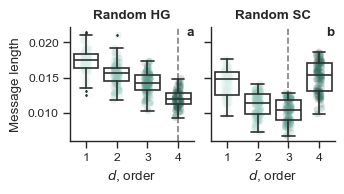

In [379]:
g = sb.catplot(
    kind="box",
    data=df,
    x="order",
    y="message length",
    col="kind",
    # col="tau idx",
    height=2,
    # margin_titles=True,
    sharey=True,
    # aspect=1.5,
    fliersize=1,
    # color="k",
)

for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, kind in enumerate(list(Hs.keys())):

    ax = g.axes[0][i]
    mask = df["kind"] == kind

    annotator = Annotator(
        ax,
        pairs,
        data=df[mask],
        y="message length",
        x="order",
        col="kind",
    )
    annotator.configure(
        test="t-test_ind",
        text_format="star",
        loc="inside",
        verbose=0,
        comparisons_correction="Bonferroni",
        line_width=1,
    )
    #annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
# title = rf"BA SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
# g.fig.suptitle(title)


g.axes[0][0].set_title("Random HG", weight="bold")
g.axes[0][1].set_title("Random SC", weight="bold")

g.axes[0][0].set_ylabel("Message length")
g.axes[0][0].set_xlabel("$d$, order")
g.axes[0][1].set_xlabel("$d$, order")

g.fig.set_size_inches(3.4, 1.8)

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

ax1.text(1, 1, "a", transform=ax1.transAxes, weight="bold", ha="right", va="top")
ax2.text(1, 1, "b", transform=ax2.transAxes, weight="bold", ha="right", va="top")

# ax2.set_ylabel("")
# ax2.set_yticklabels([])
# plt.subplots_adjust(wspace=0.1)

fig_name = f"figure_2_random"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

## Figure 2: triptic

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_6091/1469367013.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4)


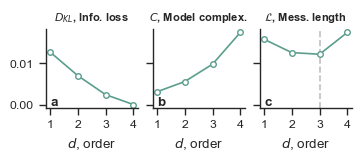

In [391]:
jj = 0
kind = "RSC" #"RHG"

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(3.5, 1.5), layout="constrained")

color = palette[2]

axs[0].plot(orders, info_losses[kind][jj], "o-", c=color, mfc="white", ms=4)
axs[1].plot(orders, complexities[kind][jj], "o-", c=color, mfc="white", ms=4)
axs[2].plot(orders, message_lengths[kind][jj], "o-", c=color, mfc="white", ms=4)

d_opt = np.argmin(message_lengths[kind][jj])
axs[2].axvline(x=orders[d_opt], ls="--", c="silver", zorder=-1)

axs[0].set_title("$D_{KL}$, Info. loss", fontsize="small", weight="bold")
axs[1].set_title("$C$, Model complex.", fontsize="small", weight="bold")
axs[2].set_title("$\mathcal{L}$, Mess. length", fontsize="small", weight="bold")

sb.despine()
plt.subplots_adjust(wspace=0.4)

for ax in axs.ravel():
    ax.set_xticks(orders)
    ax.set_xlabel("$d$, order")
    
axs[0].text(0.05, 0.002, "a", transform=axs[0].transAxes, weight="bold", ha="left", va="bottom")
axs[1].text(0.05, 0.002, "b", transform=axs[1].transAxes, weight="bold", ha="left", va="bottom")
axs[2].text(0.05, 0.002, "c", transform=axs[2].transAxes, weight="bold", ha="left", va="bottom")


fig_name = f"figure_1bis_random_triptych"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")


plt.show()

## Random hypergraph

In [254]:
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]


annotator = Annotator(None, pairs)

configuration = {
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "inside",
    "comparisons_correction": "Bonferroni",
    "line_width": 1,
}

plot_params = {
    #"data": df,
    "x": "order",
    "y": "message length",
    "hue": "order",
    "palette": palette,
}

annotator.plot_and_annotate_facets(
    plot="stripplot",
    plot_params=plot_params,
    configuration=configuration,
    annotation_func="apply_test",
    data=df
)

TypeError: cannot unpack non-iterable int object

In [154]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 100

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        xgi.write_edgelist(H, f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [05:14<00:00,  3.14s/it]


In [258]:
Annotator

<module 'statannotations.Annotator' from '/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/Annotator.py'>

In [155]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        # H = xgi.random_hypergraph(N, density * ps)
        H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

  3%|█▎                                         | 3/100 [00:11<06:04,  3.76s/it]


KeyboardInterrupt: 

In [14]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for H0 in tqdm(Hs_i):
        
        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=)
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)
                  
    info_losses[density] = info_losses_i
    complexities[density] = complexities_i
    orders_arr[density] = orders_arr_i
    message_lengths[density] = message_lengths_i                          

labels = [f"{i}" for i in density_scales]

100%|█████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


In [15]:
for i, s in enumerate(density_scales):
    message_lengths[s] = pad_arr_list(message_lengths[s])

In [17]:
df = pd.DataFrame.from_dict(message_lengths, orient="index").stack().to_frame()


def unpack_list(row):
    return pd.Series(row[0])


# Apply the function and join the new columns to the DataFrame
df[orders] = df.apply(unpack_list, axis=1)
df = df[orders]

dff = df.reset_index(names=["density", "rep"]).melt(
    id_vars=["density", "rep"],
    value_vars=orders,
    var_name="order",
    value_name="message_length",
)

dff

,density,rep,order,message_length
0,5,0,1,0.046574
1,5,1,1,0.054797
2,5,2,1,0.033745
3,5,3,1,0.048812
4,5,4,1,0.051514
5,10,0,1,0.031161
6,10,1,1,0.034709
7,10,2,1,0.040803
8,10,3,1,0.045811
9,10,4,1,0.029335


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


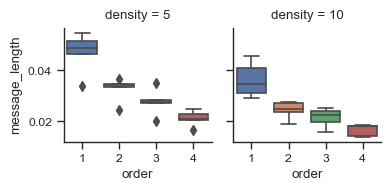

In [30]:
sb.catplot(
    kind="box",
    data=dff,
    x="order",
    y="message_length",
    ax=ax,
    col="density",
    height=2,
    margin_titles=True,
    aspect=1,
)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Welch's t-test independent samples, P_val:1.491e-03 t=3.853e+00
2 vs. 3: Welch's t-test independent samples, P_val:1.340e-01 t=1.570e+00
3 vs. 4: Welch's t-test independent samples, P_val:1.318e-02 t=2.806e+00
1 vs. 3: Welch's t-test independent samples, P_val:1.306e-04 t=5.129e+00
2 vs. 4: Welch's t-test independent samples, P_val:4.658e-04 t=4.495e+00
1 vs. 4: Welch's t-test independent samples, P_val:9.744e-06 t=7.454e+00


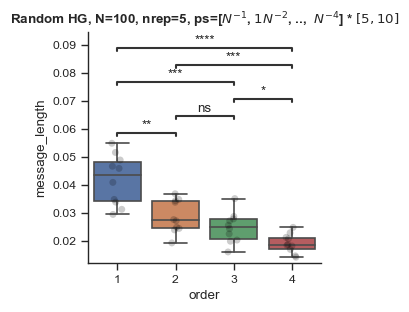

In [18]:
from statannotations.Annotator import Annotator

fix, ax = plt.subplots(figsize=(3, 3))

# palette = sb.color_palette("Set1", n_colors=4)

# box_params = {
#    'boxprops':{'facecolor':'none'},
#    'medianprops':{'color':'silver'},
#'whiskerprops':{'color':'blue'},
#'capprops':{'color':'yellow'}
# }

sb.boxplot(data=dff, x="order", y="message_length", ax=ax)  # , **box_params)

sb.stripplot(
    data=dff, x="order", y="message_length", ax=ax, color="black", dodge=True, alpha=0.2
)  # , legend=False)

sb.despine()
ax.set_title(
    rf"Random HG, N={N}, nrep={n_rep}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * ${density_scales}$",
    weight="bold",
)


pairs = list(combinations(orders, 2))

annotator = Annotator(ax, pairs, data=dff, y="message_length", x="order")
annotator.configure(test="t-test_welch", text_format="star", loc="inside")
annotator.apply_and_annotate()

fig_name = f"message_length_RHG_N{N}_pwiring_{density_scales}_nreps_{n_rep}_boxplot"
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

### Double loop: density, tau

In [25]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 3

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        xgi.write_edgelist(H, f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████████| 3/3 [00:09<00:00,  3.06s/it]


In [156]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        # H = xgi.random_hypergraph(N, density * ps)
        H = xgi.read_edgelist(f"../data/RHG_N_{N}_density_{density}_{i}.edgelist")
        # print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 55.99it/s]


In [157]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():

    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            # tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
            )

            info_losses[density][i][j] = Ds_H
            complexities[density][i][j] = lZs_H
            orders_arr[density][i][j] = orders
            message_lengths[density][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[9.16e-04 2.13e-02 4.96e-01 1.15e+01 2.69e+02]


  1%|▍                                          | 1/100 [00:15<26:13, 15.89s/it]

[5.62e-04 1.27e-02 2.86e-01 6.47e+00 1.46e+02]


  2%|▊                                          | 2/100 [00:32<26:46, 16.39s/it]

[6.75e-04 2.03e-02 6.08e-01 1.82e+01 5.47e+02]


  3%|█▎                                         | 3/100 [00:48<26:25, 16.34s/it]

[7.49e-04 1.80e-02 4.34e-01 1.05e+01 2.52e+02]


  4%|█▋                                         | 4/100 [01:04<25:46, 16.11s/it]

[3.35e-04 8.67e-03 2.25e-01 5.82e+00 1.51e+02]


  5%|██▏                                        | 5/100 [01:19<24:31, 15.49s/it]

[9.18e-04 2.00e-02 4.36e-01 9.49e+00 2.07e+02]


  6%|██▌                                        | 6/100 [01:35<25:01, 15.97s/it]

[5.59e-04 1.31e-02 3.06e-01 7.17e+00 1.68e+02]


  7%|███                                        | 7/100 [01:46<21:50, 14.09s/it]

[5.51e-04 1.23e-02 2.73e-01 6.06e+00 1.35e+02]


  8%|███▍                                       | 8/100 [02:04<23:26, 15.28s/it]

[8.87e-04 2.09e-02 4.92e-01 1.16e+01 2.73e+02]


  9%|███▊                                       | 9/100 [02:21<24:11, 15.95s/it]

[5.32e-04 1.30e-02 3.18e-01 7.77e+00 1.90e+02]


 10%|████▏                                     | 10/100 [02:38<24:32, 16.36s/it]

[7.76e-04 2.24e-02 6.48e-01 1.87e+01 5.42e+02]


 11%|████▌                                     | 11/100 [02:56<24:52, 16.77s/it]

[5.37e-04 1.21e-02 2.74e-01 6.20e+00 1.40e+02]


 12%|█████                                     | 12/100 [03:14<25:03, 17.09s/it]

[4.06e-04 1.04e-02 2.67e-01 6.83e+00 1.75e+02]


 13%|█████▍                                    | 13/100 [03:32<25:22, 17.50s/it]

[7.95e-04 2.29e-02 6.57e-01 1.89e+01 5.43e+02]


 14%|█████▉                                    | 14/100 [03:50<25:16, 17.64s/it]

[6.35e-04 1.37e-02 2.97e-01 6.43e+00 1.39e+02]


 15%|██████▎                                   | 15/100 [04:07<24:41, 17.43s/it]

[6.62e-04 1.54e-02 3.56e-01 8.24e+00 1.91e+02]


 16%|██████▋                                   | 16/100 [04:25<24:29, 17.49s/it]

[4.10e-04 1.06e-02 2.75e-01 7.12e+00 1.84e+02]


 17%|███████▏                                  | 17/100 [04:43<24:32, 17.74s/it]

[6.46e-04 1.50e-02 3.50e-01 8.14e+00 1.89e+02]


 18%|███████▌                                  | 18/100 [05:00<23:59, 17.56s/it]

[7.57e-04 1.68e-02 3.73e-01 8.27e+00 1.83e+02]


 19%|███████▉                                  | 19/100 [05:16<23:07, 17.13s/it]

[5.96e-04 1.22e-02 2.51e-01 5.16e+00 1.06e+02]


 20%|████████▍                                 | 20/100 [05:34<23:03, 17.30s/it]

[7.00e-04 1.69e-02 4.09e-01 9.88e+00 2.39e+02]


 21%|████████▊                                 | 21/100 [05:52<22:55, 17.41s/it]

[3.33e-04 9.62e-03 2.78e-01 8.02e+00 2.32e+02]


 22%|█████████▏                                | 22/100 [06:09<22:46, 17.52s/it]

[5.45e-04 1.41e-02 3.66e-01 9.50e+00 2.46e+02]


 23%|█████████▋                                | 23/100 [06:27<22:39, 17.66s/it]

[3.92e-04 9.47e-03 2.29e-01 5.53e+00 1.34e+02]


 24%|██████████                                | 24/100 [06:45<22:28, 17.74s/it]

[5.70e-04 1.34e-02 3.15e-01 7.39e+00 1.74e+02]


 25%|██████████▌                               | 25/100 [07:03<22:00, 17.61s/it]

[8.88e-04 1.95e-02 4.27e-01 9.38e+00 2.06e+02]


 26%|██████████▉                               | 26/100 [07:17<20:31, 16.64s/it]

[4.99e-04 1.24e-02 3.06e-01 7.56e+00 1.87e+02]


 27%|███████████▎                              | 27/100 [07:33<20:03, 16.48s/it]

[6.50e-04 1.36e-02 2.85e-01 5.96e+00 1.25e+02]


 28%|███████████▊                              | 28/100 [07:50<20:04, 16.73s/it]

[6.29e-04 1.63e-02 4.25e-01 1.10e+01 2.87e+02]


 29%|████████████▏                             | 29/100 [08:08<19:58, 16.87s/it]

[5.63e-04 1.46e-02 3.81e-01 9.92e+00 2.58e+02]


 30%|████████████▌                             | 30/100 [08:26<20:02, 17.18s/it]

[5.69e-04 1.26e-02 2.81e-01 6.25e+00 1.39e+02]


 31%|█████████████                             | 31/100 [08:42<19:22, 16.85s/it]

[8.43e-04 2.03e-02 4.87e-01 1.17e+01 2.81e+02]


 32%|█████████████▍                            | 32/100 [08:58<18:56, 16.72s/it]

[6.57e-04 1.36e-02 2.83e-01 5.88e+00 1.22e+02]


 33%|█████████████▊                            | 33/100 [09:15<18:52, 16.90s/it]

[5.47e-04 1.74e-02 5.53e-01 1.76e+01 5.60e+02]


 34%|██████████████▎                           | 34/100 [09:34<19:00, 17.27s/it]

[3.58e-04 9.23e-03 2.38e-01 6.15e+00 1.59e+02]


 35%|██████████████▋                           | 35/100 [09:52<19:00, 17.55s/it]

[5.70e-04 1.51e-02 3.97e-01 1.05e+01 2.77e+02]


 36%|███████████████                           | 36/100 [10:07<18:03, 16.92s/it]

[5.26e-04 1.41e-02 3.79e-01 1.02e+01 2.73e+02]


 37%|███████████████▌                          | 37/100 [10:23<17:32, 16.71s/it]

[5.21e-04 1.32e-02 3.35e-01 8.50e+00 2.16e+02]


 38%|███████████████▉                          | 38/100 [10:38<16:28, 15.94s/it]

[6.55e-04 1.57e-02 3.78e-01 9.09e+00 2.19e+02]


 39%|████████████████▍                         | 39/100 [10:55<16:42, 16.43s/it]

[5.81e-04 1.26e-02 2.73e-01 5.93e+00 1.29e+02]


 40%|████████████████▊                         | 40/100 [11:12<16:37, 16.63s/it]

[5.80e-04 1.70e-02 5.01e-01 1.47e+01 4.32e+02]


 41%|█████████████████▏                        | 41/100 [11:28<16:11, 16.47s/it]

[5.69e-04 1.38e-02 3.33e-01 8.07e+00 1.95e+02]


 42%|█████████████████▋                        | 42/100 [11:46<16:17, 16.85s/it]

[3.79e-04 1.00e-02 2.64e-01 6.95e+00 1.83e+02]


 43%|██████████████████                        | 43/100 [12:03<16:02, 16.88s/it]

[6.68e-04 1.69e-02 4.30e-01 1.09e+01 2.76e+02]


 44%|██████████████████▍                       | 44/100 [12:20<15:53, 17.03s/it]

[3.36e-04 9.91e-03 2.92e-01 8.63e+00 2.55e+02]


 45%|██████████████████▉                       | 45/100 [12:38<15:50, 17.29s/it]

[6.44e-04 1.89e-02 5.55e-01 1.63e+01 4.79e+02]


 46%|███████████████████▎                      | 46/100 [12:57<15:58, 17.76s/it]

[5.90e-04 1.33e-02 3.01e-01 6.80e+00 1.54e+02]


 47%|███████████████████▋                      | 47/100 [13:15<15:44, 17.81s/it]

[4.60e-04 1.06e-02 2.42e-01 5.56e+00 1.28e+02]


 48%|████████████████████▏                     | 48/100 [13:33<15:34, 17.98s/it]

[5.49e-04 1.71e-02 5.33e-01 1.66e+01 5.18e+02]


 49%|████████████████████▌                     | 49/100 [13:52<15:30, 18.24s/it]

[8.52e-04 1.84e-02 3.98e-01 8.61e+00 1.86e+02]


 50%|█████████████████████                     | 50/100 [14:11<15:16, 18.32s/it]

[7.56e-04 1.56e-02 3.23e-01 6.67e+00 1.38e+02]


 51%|█████████████████████▍                    | 51/100 [14:29<14:49, 18.16s/it]

[5.64e-04 1.39e-02 3.44e-01 8.48e+00 2.09e+02]


 52%|█████████████████████▊                    | 52/100 [14:47<14:43, 18.40s/it]

[1.22e-03 3.06e-02 7.68e-01 1.93e+01 4.84e+02]


 53%|██████████████████████▎                   | 53/100 [15:02<13:27, 17.17s/it]

[3.49e-04 8.42e-03 2.03e-01 4.89e+00 1.18e+02]


 54%|██████████████████████▋                   | 54/100 [15:21<13:33, 17.68s/it]

[9.53e-04 1.99e-02 4.15e-01 8.67e+00 1.81e+02]


 55%|███████████████████████                   | 55/100 [15:39<13:28, 17.98s/it]

[5.97e-04 1.57e-02 4.15e-01 1.10e+01 2.89e+02]


 56%|███████████████████████▌                  | 56/100 [15:58<13:23, 18.26s/it]

[7.42e-04 2.10e-02 5.96e-01 1.69e+01 4.79e+02]


 57%|███████████████████████▉                  | 57/100 [16:17<13:17, 18.55s/it]

[6.45e-04 1.64e-02 4.17e-01 1.06e+01 2.70e+02]


 58%|████████████████████████▎                 | 58/100 [16:36<12:53, 18.42s/it]

[7.53e-04 1.65e-02 3.63e-01 7.96e+00 1.75e+02]


 59%|████████████████████████▊                 | 59/100 [16:53<12:26, 18.20s/it]

[5.58e-04 1.46e-02 3.82e-01 9.99e+00 2.61e+02]


 60%|█████████████████████████▏                | 60/100 [17:12<12:09, 18.24s/it]

[8.06e-04 1.80e-02 4.00e-01 8.91e+00 1.98e+02]


 61%|█████████████████████████▌                | 61/100 [17:30<11:56, 18.38s/it]

[1.04e-03 2.08e-02 4.14e-01 8.23e+00 1.64e+02]


 62%|██████████████████████████                | 62/100 [17:49<11:40, 18.43s/it]

[7.40e-04 1.46e-02 2.89e-01 5.72e+00 1.13e+02]


 63%|██████████████████████████▍               | 63/100 [18:07<11:19, 18.36s/it]

[5.23e-04 1.62e-02 5.01e-01 1.55e+01 4.79e+02]


 64%|██████████████████████████▉               | 64/100 [18:26<11:07, 18.55s/it]

[5.12e-04 1.36e-02 3.60e-01 9.54e+00 2.53e+02]


 65%|███████████████████████████▎              | 65/100 [18:44<10:39, 18.26s/it]

[6.06e-04 1.93e-02 6.12e-01 1.95e+01 6.19e+02]


 66%|███████████████████████████▋              | 66/100 [19:01<10:14, 18.07s/it]

[3.49e-04 1.23e-02 4.30e-01 1.51e+01 5.30e+02]


 67%|████████████████████████████▏             | 67/100 [19:19<09:53, 17.97s/it]

[8.42e-04 1.84e-02 4.03e-01 8.83e+00 1.93e+02]


 68%|████████████████████████████▌             | 68/100 [19:38<09:49, 18.41s/it]

[7.97e-04 1.77e-02 3.92e-01 8.70e+00 1.93e+02]


 69%|████████████████████████████▉             | 69/100 [19:58<09:37, 18.64s/it]

[6.00e-04 1.44e-02 3.46e-01 8.30e+00 1.99e+02]


 70%|█████████████████████████████▍            | 70/100 [20:17<09:28, 18.94s/it]

[5.98e-04 1.46e-02 3.55e-01 8.66e+00 2.11e+02]


 71%|█████████████████████████████▊            | 71/100 [20:36<09:09, 18.94s/it]

[8.39e-04 1.98e-02 4.69e-01 1.11e+01 2.62e+02]


 72%|██████████████████████████████▏           | 72/100 [20:55<08:51, 18.98s/it]

[6.36e-04 1.39e-02 3.03e-01 6.61e+00 1.44e+02]


 73%|██████████████████████████████▋           | 73/100 [21:14<08:29, 18.88s/it]

[5.95e-04 1.56e-02 4.10e-01 1.08e+01 2.82e+02]


 74%|███████████████████████████████           | 74/100 [21:33<08:11, 18.90s/it]

[6.80e-04 1.54e-02 3.49e-01 7.93e+00 1.80e+02]


 75%|███████████████████████████████▌          | 75/100 [21:52<07:51, 18.84s/it]

[7.31e-04 2.17e-02 6.45e-01 1.92e+01 5.70e+02]


 76%|███████████████████████████████▉          | 76/100 [22:04<06:49, 17.06s/it]

[6.72e-04 1.52e-02 3.43e-01 7.73e+00 1.75e+02]


 77%|████████████████████████████████▎         | 77/100 [22:24<06:46, 17.66s/it]

[5.06e-04 1.29e-02 3.29e-01 8.38e+00 2.14e+02]


 78%|████████████████████████████████▊         | 78/100 [22:42<06:36, 18.02s/it]

[8.60e-04 2.05e-02 4.87e-01 1.16e+01 2.76e+02]


 79%|█████████████████████████████████▏        | 79/100 [23:02<06:27, 18.46s/it]

[5.58e-04 1.32e-02 3.12e-01 7.36e+00 1.74e+02]


 80%|█████████████████████████████████▌        | 80/100 [23:21<06:12, 18.62s/it]

[5.56e-04 1.44e-02 3.72e-01 9.63e+00 2.49e+02]


 81%|██████████████████████████████████        | 81/100 [23:40<05:57, 18.80s/it]

[8.32e-04 1.67e-02 3.36e-01 6.76e+00 1.36e+02]


 82%|██████████████████████████████████▍       | 82/100 [23:59<05:38, 18.79s/it]

[7.62e-04 1.82e-02 4.36e-01 1.04e+01 2.50e+02]


 83%|██████████████████████████████████▊       | 83/100 [24:18<05:21, 18.91s/it]

[7.07e-04 1.71e-02 4.12e-01 9.93e+00 2.40e+02]


 84%|███████████████████████████████████▎      | 84/100 [24:37<05:02, 18.91s/it]

[4.90e-04 1.31e-02 3.49e-01 9.30e+00 2.48e+02]


 85%|███████████████████████████████████▋      | 85/100 [24:56<04:42, 18.83s/it]

[3.47e-04 9.34e-03 2.51e-01 6.76e+00 1.82e+02]


 86%|████████████████████████████████████      | 86/100 [25:14<04:23, 18.84s/it]

[8.84e-04 1.75e-02 3.46e-01 6.85e+00 1.36e+02]


 87%|████████████████████████████████████▌     | 87/100 [25:33<04:04, 18.78s/it]

[7.74e-04 1.67e-02 3.60e-01 7.77e+00 1.68e+02]


 88%|████████████████████████████████████▉     | 88/100 [25:52<03:45, 18.82s/it]

[5.27e-04 1.21e-02 2.80e-01 6.45e+00 1.49e+02]


 89%|█████████████████████████████████████▍    | 89/100 [26:11<03:28, 18.92s/it]

[7.65e-04 1.70e-02 3.80e-01 8.46e+00 1.88e+02]


 90%|█████████████████████████████████████▊    | 90/100 [26:30<03:08, 18.85s/it]

[5.15e-04 1.37e-02 3.64e-01 9.69e+00 2.58e+02]


 91%|██████████████████████████████████████▏   | 91/100 [26:49<02:49, 18.89s/it]

[3.16e-04 8.27e-03 2.17e-01 5.69e+00 1.49e+02]


 92%|██████████████████████████████████████▋   | 92/100 [27:08<02:31, 18.97s/it]

[3.31e-04 1.00e-02 3.04e-01 9.23e+00 2.80e+02]


 93%|███████████████████████████████████████   | 93/100 [27:25<02:08, 18.38s/it]

[9.77e-04 1.87e-02 3.57e-01 6.81e+00 1.30e+02]


 94%|███████████████████████████████████████▍  | 94/100 [27:42<01:48, 18.06s/it]

[7.06e-04 1.43e-02 2.90e-01 5.87e+00 1.19e+02]


 95%|███████████████████████████████████████▉  | 95/100 [28:01<01:30, 18.11s/it]

[6.39e-04 1.38e-02 2.99e-01 6.49e+00 1.40e+02]


 96%|████████████████████████████████████████▎ | 96/100 [28:18<01:11, 18.00s/it]

[6.43e-04 1.91e-02 5.65e-01 1.68e+01 4.97e+02]


 97%|████████████████████████████████████████▋ | 97/100 [28:36<00:53, 17.90s/it]

[1.49e-03 2.73e-02 4.99e-01 9.12e+00 1.67e+02]


 98%|█████████████████████████████████████████▏| 98/100 [28:49<00:32, 16.34s/it]

[5.03e-04 1.08e-02 2.33e-01 5.02e+00 1.08e+02]


 99%|█████████████████████████████████████████▌| 99/100 [29:06<00:16, 16.78s/it]

[8.60e-04 1.79e-02 3.71e-01 7.70e+00 1.60e+02]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.05e-03 1.90e-02 3.45e-01 6.26e+00 1.14e+02]


  1%|▍                                          | 1/100 [00:17<29:20, 17.79s/it]

[7.53e-04 1.42e-02 2.69e-01 5.10e+00 9.64e+01]


  2%|▊                                          | 2/100 [00:35<29:26, 18.03s/it]

[8.88e-04 1.64e-02 3.02e-01 5.58e+00 1.03e+02]


  3%|█▎                                         | 3/100 [00:53<28:42, 17.75s/it]

[6.95e-04 1.44e-02 2.98e-01 6.19e+00 1.28e+02]


  4%|█▋                                         | 4/100 [01:11<28:29, 17.81s/it]

[6.16e-04 1.14e-02 2.10e-01 3.89e+00 7.18e+01]


  5%|██▏                                        | 5/100 [01:27<27:20, 17.27s/it]

[8.79e-04 1.63e-02 3.01e-01 5.57e+00 1.03e+02]


  6%|██▌                                        | 6/100 [01:44<26:58, 17.22s/it]

[6.61e-04 1.24e-02 2.33e-01 4.37e+00 8.20e+01]


  7%|███                                        | 7/100 [02:01<26:29, 17.09s/it]

[1.03e-03 1.76e-02 3.01e-01 5.13e+00 8.74e+01]


  8%|███▍                                       | 8/100 [02:18<26:21, 17.19s/it]

[1.22e-03 2.12e-02 3.68e-01 6.40e+00 1.11e+02]


  9%|███▊                                       | 9/100 [02:36<26:10, 17.26s/it]

[8.61e-04 1.45e-02 2.46e-01 4.16e+00 7.03e+01]


 10%|████▏                                     | 10/100 [02:53<25:50, 17.23s/it]

[6.78e-04 1.29e-02 2.47e-01 4.72e+00 9.01e+01]


 11%|████▌                                     | 11/100 [03:10<25:28, 17.17s/it]

[8.06e-04 1.88e-02 4.40e-01 1.03e+01 2.40e+02]


 12%|█████                                     | 12/100 [03:28<25:22, 17.30s/it]

[1.00e-03 1.74e-02 3.02e-01 5.23e+00 9.09e+01]


 13%|█████▍                                    | 13/100 [03:45<25:13, 17.39s/it]

[7.37e-04 1.43e-02 2.77e-01 5.36e+00 1.04e+02]


 14%|█████▉                                    | 14/100 [04:03<24:54, 17.38s/it]

[8.87e-04 1.54e-02 2.68e-01 4.67e+00 8.11e+01]


 15%|██████▎                                   | 15/100 [04:20<24:32, 17.32s/it]

[1.06e-03 1.77e-02 2.94e-01 4.90e+00 8.15e+01]


 16%|██████▋                                   | 16/100 [04:37<24:07, 17.23s/it]

[5.94e-04 1.15e-02 2.24e-01 4.35e+00 8.44e+01]


 17%|███████▏                                  | 17/100 [04:54<23:45, 17.17s/it]

[8.75e-04 1.43e-02 2.35e-01 3.86e+00 6.32e+01]


 18%|███████▌                                  | 18/100 [05:11<23:34, 17.25s/it]

[8.29e-04 1.55e-02 2.88e-01 5.38e+00 1.00e+02]


 19%|███████▉                                  | 19/100 [05:29<23:19, 17.28s/it]

[8.26e-04 1.48e-02 2.66e-01 4.77e+00 8.55e+01]


 20%|████████▍                                 | 20/100 [05:46<22:59, 17.25s/it]

[8.20e-04 1.53e-02 2.86e-01 5.34e+00 9.97e+01]


 21%|████████▊                                 | 21/100 [06:03<22:44, 17.27s/it]

[1.14e-03 1.75e-02 2.69e-01 4.13e+00 6.34e+01]


 22%|█████████▏                                | 22/100 [06:20<22:17, 17.15s/it]

[8.29e-04 1.45e-02 2.53e-01 4.42e+00 7.71e+01]


 23%|█████████▋                                | 23/100 [06:37<22:01, 17.16s/it]

[1.10e-03 2.03e-02 3.76e-01 6.95e+00 1.28e+02]


 24%|██████████                                | 24/100 [06:55<21:48, 17.22s/it]

[7.76e-04 1.45e-02 2.72e-01 5.10e+00 9.56e+01]


 25%|██████████▌                               | 25/100 [07:12<21:35, 17.27s/it]

[9.03e-04 1.65e-02 3.00e-01 5.47e+00 9.98e+01]


 26%|██████████▉                               | 26/100 [07:29<21:14, 17.22s/it]

[9.27e-04 1.56e-02 2.64e-01 4.46e+00 7.52e+01]


 27%|███████████▎                              | 27/100 [07:46<20:55, 17.20s/it]

[9.93e-04 1.85e-02 3.45e-01 6.42e+00 1.20e+02]


 28%|███████████▊                              | 28/100 [08:04<20:42, 17.25s/it]

[6.99e-04 1.40e-02 2.79e-01 5.59e+00 1.12e+02]


 29%|████████████▏                             | 29/100 [08:21<20:30, 17.33s/it]

[9.17e-04 1.71e-02 3.19e-01 5.96e+00 1.11e+02]


 30%|████████████▌                             | 30/100 [08:41<21:08, 18.12s/it]

[6.92e-04 1.30e-02 2.43e-01 4.54e+00 8.51e+01]


 31%|█████████████                             | 31/100 [09:00<21:10, 18.42s/it]

[7.33e-04 1.32e-02 2.38e-01 4.28e+00 7.71e+01]


 32%|█████████████▍                            | 32/100 [09:19<21:05, 18.61s/it]

[7.76e-04 1.36e-02 2.37e-01 4.13e+00 7.22e+01]


 33%|█████████████▊                            | 33/100 [09:38<20:56, 18.76s/it]

[1.00e-03 1.72e-02 2.95e-01 5.05e+00 8.67e+01]


 34%|██████████████▎                           | 34/100 [09:58<20:48, 18.92s/it]

[8.48e-04 1.65e-02 3.19e-01 6.20e+00 1.20e+02]


 35%|██████████████▋                           | 35/100 [10:17<20:30, 18.93s/it]

[7.98e-04 1.36e-02 2.31e-01 3.93e+00 6.69e+01]


 36%|███████████████                           | 36/100 [10:36<20:21, 19.09s/it]

[9.60e-04 1.85e-02 3.55e-01 6.83e+00 1.31e+02]


 37%|███████████████▌                          | 37/100 [10:55<19:58, 19.02s/it]

[1.06e-03 1.71e-02 2.76e-01 4.45e+00 7.18e+01]


 38%|███████████████▉                          | 38/100 [11:12<19:11, 18.57s/it]

[7.78e-04 1.48e-02 2.83e-01 5.40e+00 1.03e+02]


 39%|████████████████▍                         | 39/100 [11:30<18:25, 18.13s/it]

[7.04e-04 1.40e-02 2.80e-01 5.59e+00 1.12e+02]


 40%|████████████████▊                         | 40/100 [11:48<18:08, 18.14s/it]

[1.12e-03 1.85e-02 3.06e-01 5.06e+00 8.38e+01]


 41%|█████████████████▏                        | 41/100 [12:04<17:10, 17.47s/it]

[1.18e-03 1.85e-02 2.89e-01 4.53e+00 7.09e+01]


 42%|█████████████████▋                        | 42/100 [12:19<16:22, 16.94s/it]

[8.34e-04 1.46e-02 2.57e-01 4.52e+00 7.94e+01]


 43%|██████████████████                        | 43/100 [12:36<16:04, 16.92s/it]

[9.09e-04 1.57e-02 2.72e-01 4.71e+00 8.14e+01]


 44%|██████████████████▍                       | 44/100 [12:53<15:53, 17.03s/it]

[1.06e-03 1.85e-02 3.26e-01 5.73e+00 1.01e+02]


 45%|██████████████████▉                       | 45/100 [13:11<15:46, 17.21s/it]

[8.53e-04 1.45e-02 2.48e-01 4.22e+00 7.19e+01]


 46%|███████████████████▎                      | 46/100 [13:29<15:38, 17.38s/it]

[1.05e-03 1.79e-02 3.08e-01 5.28e+00 9.05e+01]


 47%|███████████████████▋                      | 47/100 [13:47<15:37, 17.68s/it]

[7.65e-04 1.43e-02 2.68e-01 5.02e+00 9.40e+01]


 48%|████████████████████▏                     | 48/100 [14:05<15:27, 17.83s/it]

[8.56e-04 1.50e-02 2.64e-01 4.64e+00 8.14e+01]


 49%|████████████████████▌                     | 49/100 [14:23<15:09, 17.84s/it]

[6.05e-04 1.26e-02 2.61e-01 5.43e+00 1.13e+02]


 50%|█████████████████████                     | 50/100 [14:41<14:55, 17.91s/it]

[8.52e-04 1.69e-02 3.37e-01 6.70e+00 1.33e+02]


 51%|█████████████████████▍                    | 51/100 [14:58<14:22, 17.60s/it]

[9.81e-04 1.74e-02 3.08e-01 5.45e+00 9.66e+01]


 52%|█████████████████████▊                    | 52/100 [15:16<14:01, 17.53s/it]

[1.04e-03 1.81e-02 3.16e-01 5.51e+00 9.62e+01]


 53%|██████████████████████▎                   | 53/100 [15:33<13:45, 17.57s/it]

[6.73e-04 1.29e-02 2.48e-01 4.76e+00 9.13e+01]


 54%|██████████████████████▋                   | 54/100 [15:50<13:20, 17.40s/it]

[7.87e-04 1.52e-02 2.93e-01 5.65e+00 1.09e+02]


 55%|███████████████████████                   | 55/100 [16:08<13:06, 17.47s/it]

[1.01e-03 1.81e-02 3.24e-01 5.80e+00 1.04e+02]


 56%|███████████████████████▌                  | 56/100 [16:25<12:49, 17.50s/it]

[7.96e-04 1.43e-02 2.56e-01 4.60e+00 8.25e+01]


 57%|███████████████████████▉                  | 57/100 [16:44<12:39, 17.66s/it]

[1.07e-03 1.76e-02 2.92e-01 4.84e+00 8.02e+01]


 58%|████████████████████████▎                 | 58/100 [17:00<12:03, 17.23s/it]

[1.01e-03 2.00e-02 3.99e-01 7.93e+00 1.58e+02]


 59%|████████████████████████▊                 | 59/100 [17:17<11:48, 17.28s/it]

[9.32e-04 1.64e-02 2.90e-01 5.11e+00 9.01e+01]


 60%|█████████████████████████▏                | 60/100 [17:36<11:46, 17.65s/it]

[7.12e-04 1.38e-02 2.68e-01 5.22e+00 1.01e+02]


 61%|█████████████████████████▌                | 61/100 [17:54<11:33, 17.77s/it]

[1.17e-03 1.77e-02 2.68e-01 4.07e+00 6.17e+01]


 62%|██████████████████████████                | 62/100 [18:11<11:06, 17.54s/it]

[9.57e-04 1.68e-02 2.96e-01 5.21e+00 9.16e+01]


 63%|██████████████████████████▍               | 63/100 [18:28<10:43, 17.39s/it]

[1.06e-03 1.89e-02 3.35e-01 5.95e+00 1.06e+02]


 64%|██████████████████████████▉               | 64/100 [18:45<10:20, 17.23s/it]

[5.08e-04 1.12e-02 2.45e-01 5.38e+00 1.18e+02]


 65%|███████████████████████████▎              | 65/100 [19:02<10:06, 17.32s/it]

[8.40e-04 1.59e-02 3.02e-01 5.72e+00 1.08e+02]


 66%|███████████████████████████▋              | 66/100 [19:18<09:34, 16.91s/it]

[6.07e-04 1.20e-02 2.38e-01 4.70e+00 9.29e+01]


 67%|████████████████████████████▏             | 67/100 [19:35<09:13, 16.79s/it]

[8.39e-04 1.57e-02 2.95e-01 5.54e+00 1.04e+02]


 68%|████████████████████████████▌             | 68/100 [19:52<09:02, 16.94s/it]

[9.39e-04 1.58e-02 2.66e-01 4.48e+00 7.55e+01]


 69%|████████████████████████████▉             | 69/100 [20:08<08:38, 16.71s/it]

[9.30e-04 1.56e-02 2.61e-01 4.36e+00 7.30e+01]


 70%|█████████████████████████████▍            | 70/100 [20:27<08:40, 17.34s/it]

[7.61e-04 1.45e-02 2.76e-01 5.26e+00 1.00e+02]


 71%|█████████████████████████████▊            | 71/100 [20:45<08:32, 17.66s/it]

[8.04e-04 1.41e-02 2.47e-01 4.32e+00 7.57e+01]


 72%|██████████████████████████████▏           | 72/100 [21:01<08:00, 17.15s/it]

[8.93e-04 1.60e-02 2.87e-01 5.14e+00 9.21e+01]


 73%|██████████████████████████████▋           | 73/100 [21:17<07:28, 16.60s/it]

[7.25e-04 1.43e-02 2.80e-01 5.50e+00 1.08e+02]


 74%|███████████████████████████████           | 74/100 [21:34<07:19, 16.91s/it]

[7.21e-04 1.59e-02 3.50e-01 7.72e+00 1.70e+02]


 75%|███████████████████████████████▌          | 75/100 [21:52<07:06, 17.06s/it]

[7.06e-04 1.40e-02 2.78e-01 5.53e+00 1.10e+02]


 76%|███████████████████████████████▉          | 76/100 [22:09<06:48, 17.04s/it]

[7.82e-04 1.58e-02 3.20e-01 6.49e+00 1.31e+02]


 77%|████████████████████████████████▎         | 77/100 [22:23<06:17, 16.39s/it]

[9.86e-04 1.79e-02 3.27e-01 5.94e+00 1.08e+02]


 78%|████████████████████████████████▊         | 78/100 [22:40<06:02, 16.47s/it]

[6.75e-04 1.24e-02 2.29e-01 4.21e+00 7.75e+01]


 79%|█████████████████████████████████▏        | 79/100 [22:59<05:59, 17.10s/it]

[8.89e-04 1.62e-02 2.96e-01 5.41e+00 9.87e+01]


 80%|█████████████████████████████████▌        | 80/100 [23:16<05:45, 17.26s/it]

[8.15e-04 1.47e-02 2.65e-01 4.77e+00 8.59e+01]


 81%|██████████████████████████████████        | 81/100 [23:30<05:07, 16.20s/it]

[9.48e-04 1.67e-02 2.93e-01 5.14e+00 9.04e+01]


 82%|██████████████████████████████████▍       | 82/100 [23:45<04:43, 15.74s/it]

[9.04e-04 1.60e-02 2.83e-01 5.00e+00 8.84e+01]


 83%|██████████████████████████████████▊       | 83/100 [24:02<04:35, 16.22s/it]

[8.45e-04 1.50e-02 2.67e-01 4.75e+00 8.44e+01]


 84%|███████████████████████████████████▎      | 84/100 [24:19<04:22, 16.44s/it]

[5.78e-04 1.10e-02 2.09e-01 3.99e+00 7.60e+01]


 85%|███████████████████████████████████▋      | 85/100 [24:37<04:12, 16.82s/it]

[1.02e-03 1.80e-02 3.17e-01 5.59e+00 9.84e+01]


 86%|████████████████████████████████████      | 86/100 [24:54<03:59, 17.10s/it]

[1.05e-03 1.79e-02 3.04e-01 5.16e+00 8.76e+01]


 87%|████████████████████████████████████▌     | 87/100 [25:12<03:42, 17.11s/it]

[8.27e-04 1.55e-02 2.89e-01 5.41e+00 1.01e+02]


 88%|████████████████████████████████████▉     | 88/100 [25:29<03:25, 17.10s/it]

[8.85e-04 1.59e-02 2.87e-01 5.16e+00 9.29e+01]


 89%|█████████████████████████████████████▍    | 89/100 [25:44<03:02, 16.59s/it]

[8.00e-04 1.47e-02 2.70e-01 4.96e+00 9.11e+01]


 90%|█████████████████████████████████████▊    | 90/100 [26:01<02:45, 16.60s/it]

[9.12e-04 1.61e-02 2.84e-01 5.03e+00 8.88e+01]


 91%|██████████████████████████████████████▏   | 91/100 [26:17<02:29, 16.59s/it]

[9.95e-04 1.75e-02 3.08e-01 5.41e+00 9.52e+01]


 92%|██████████████████████████████████████▋   | 92/100 [26:34<02:12, 16.62s/it]

[8.32e-04 1.50e-02 2.71e-01 4.88e+00 8.81e+01]


 93%|███████████████████████████████████████   | 93/100 [26:50<01:54, 16.40s/it]

[6.66e-04 1.24e-02 2.31e-01 4.29e+00 7.99e+01]


 94%|███████████████████████████████████████▍  | 94/100 [27:06<01:38, 16.45s/it]

[8.01e-04 1.43e-02 2.56e-01 4.57e+00 8.16e+01]


 95%|███████████████████████████████████████▉  | 95/100 [27:24<01:23, 16.76s/it]

[7.20e-04 1.35e-02 2.53e-01 4.74e+00 8.88e+01]


 96%|████████████████████████████████████████▎ | 96/100 [27:39<01:04, 16.19s/it]

[7.94e-04 1.47e-02 2.74e-01 5.09e+00 9.45e+01]


 97%|████████████████████████████████████████▋ | 97/100 [27:54<00:48, 16.02s/it]

[9.22e-04 1.73e-02 3.24e-01 6.08e+00 1.14e+02]


 98%|█████████████████████████████████████████▏| 98/100 [28:11<00:32, 16.23s/it]

[9.03e-04 1.66e-02 3.03e-01 5.55e+00 1.02e+02]


 99%|█████████████████████████████████████████▌| 99/100 [28:29<00:16, 16.82s/it]

[7.80e-04 1.48e-02 2.80e-01 5.32e+00 1.01e+02]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.42e-03 1.84e-02 2.37e-01 3.07e+00 3.96e+01]


  1%|▍                                          | 1/100 [00:16<27:48, 16.86s/it]

[1.51e-03 2.00e-02 2.65e-01 3.50e+00 4.63e+01]


  2%|▊                                          | 2/100 [00:33<27:21, 16.75s/it]

[1.52e-03 1.98e-02 2.58e-01 3.35e+00 4.35e+01]


  3%|█▎                                         | 3/100 [00:52<28:22, 17.55s/it]

[1.49e-03 1.95e-02 2.56e-01 3.35e+00 4.40e+01]


  4%|█▋                                         | 4/100 [01:09<27:53, 17.44s/it]

[1.53e-03 1.97e-02 2.53e-01 3.27e+00 4.21e+01]


  5%|██▏                                        | 5/100 [01:27<27:48, 17.56s/it]

[1.59e-03 2.06e-02 2.68e-01 3.47e+00 4.50e+01]


  6%|██▌                                        | 6/100 [01:42<26:12, 16.72s/it]

[1.59e-03 2.05e-02 2.63e-01 3.38e+00 4.34e+01]


  7%|███                                        | 7/100 [01:59<26:16, 16.96s/it]

[1.43e-03 1.88e-02 2.48e-01 3.26e+00 4.29e+01]


  8%|███▍                                       | 8/100 [02:16<26:07, 17.04s/it]

[1.65e-03 2.09e-02 2.66e-01 3.37e+00 4.28e+01]


  9%|███▊                                       | 9/100 [02:34<25:59, 17.14s/it]

[1.59e-03 2.00e-02 2.53e-01 3.19e+00 4.02e+01]


 10%|████▏                                     | 10/100 [02:52<26:07, 17.42s/it]

[1.50e-03 1.94e-02 2.51e-01 3.25e+00 4.21e+01]


 11%|████▌                                     | 11/100 [03:08<25:23, 17.12s/it]

[1.58e-03 2.03e-02 2.60e-01 3.34e+00 4.29e+01]


 12%|█████                                     | 12/100 [03:25<25:10, 17.17s/it]

[1.46e-03 1.90e-02 2.47e-01 3.22e+00 4.20e+01]


 13%|█████▍                                    | 13/100 [03:44<25:26, 17.54s/it]

[1.54e-03 2.03e-02 2.66e-01 3.50e+00 4.59e+01]


 14%|█████▉                                    | 14/100 [04:02<25:32, 17.82s/it]

[1.56e-03 1.97e-02 2.48e-01 3.13e+00 3.94e+01]


 15%|██████▎                                   | 15/100 [04:21<25:28, 17.98s/it]

[1.50e-03 1.93e-02 2.48e-01 3.19e+00 4.10e+01]


 16%|██████▋                                   | 16/100 [04:37<24:41, 17.63s/it]

[1.55e-03 2.12e-02 2.90e-01 3.96e+00 5.42e+01]


 17%|███████▏                                  | 17/100 [04:55<24:16, 17.54s/it]

[1.52e-03 1.98e-02 2.59e-01 3.39e+00 4.42e+01]


 18%|███████▌                                  | 18/100 [05:12<23:51, 17.45s/it]

[1.42e-03 1.87e-02 2.46e-01 3.23e+00 4.25e+01]


 19%|███████▉                                  | 19/100 [05:30<23:56, 17.74s/it]

[1.44e-03 1.93e-02 2.59e-01 3.48e+00 4.68e+01]


 20%|████████▍                                 | 20/100 [05:48<23:39, 17.75s/it]

[1.39e-03 1.83e-02 2.40e-01 3.16e+00 4.16e+01]


 21%|████████▊                                 | 21/100 [06:04<22:46, 17.29s/it]

[1.58e-03 1.99e-02 2.51e-01 3.17e+00 3.99e+01]


 22%|█████████▏                                | 22/100 [06:22<22:45, 17.51s/it]

[1.53e-03 1.99e-02 2.59e-01 3.37e+00 4.38e+01]


 23%|█████████▋                                | 23/100 [06:42<23:10, 18.05s/it]

[1.47e-03 1.95e-02 2.59e-01 3.44e+00 4.57e+01]


 24%|█████████▌                              | 24/100 [10:53<1:51:38, 88.13s/it]

[1.37e-03 1.80e-02 2.37e-01 3.12e+00 4.10e+01]


 25%|██████████                              | 25/100 [11:13<1:24:20, 67.47s/it]

[1.46e-03 1.93e-02 2.54e-01 3.35e+00 4.42e+01]


 26%|██████████▏                            | 26/100 [28:09<7:14:22, 352.19s/it]

[1.42e-03 1.94e-02 2.64e-01 3.60e+00 4.92e+01]


 27%|██████████▎                           | 27/100 [56:41<15:24:45, 760.07s/it]

[1.28e-03 1.75e-02 2.40e-01 3.28e+00 4.49e+01]


 28%|██████████▋                           | 28/100 [57:00<10:45:20, 537.78s/it]

[1.43e-03 1.90e-02 2.53e-01 3.37e+00 4.49e+01]


 29%|███████████▎                           | 29/100 [57:19<7:32:18, 382.23s/it]

[1.52e-03 2.00e-02 2.63e-01 3.46e+00 4.56e+01]


 30%|███████████                          | 30/100 [1:06:25<8:22:59, 431.14s/it]

[1.56e-03 2.11e-02 2.86e-01 3.87e+00 5.23e+01]


 31%|███████████▍                         | 31/100 [1:06:45<5:54:03, 307.87s/it]

[1.55e-03 1.98e-02 2.51e-01 3.20e+00 4.07e+01]


 32%|███████████▊                         | 32/100 [1:07:03<4:10:26, 220.97s/it]

[1.58e-03 2.00e-02 2.52e-01 3.19e+00 4.04e+01]


 33%|████████████▏                        | 33/100 [1:07:21<2:58:37, 159.97s/it]

[1.47e-03 1.94e-02 2.58e-01 3.42e+00 4.54e+01]


 34%|████████████▌                        | 34/100 [1:07:39<2:09:10, 117.43s/it]

[1.61e-03 2.04e-02 2.58e-01 3.27e+00 4.15e+01]


 35%|█████████████▎                        | 35/100 [1:07:57<1:34:54, 87.61s/it]

[1.41e-03 1.91e-02 2.59e-01 3.52e+00 4.77e+01]


 36%|█████████████▋                        | 36/100 [1:08:14<1:10:58, 66.53s/it]

[1.52e-03 1.98e-02 2.57e-01 3.34e+00 4.33e+01]


 37%|██████████████▊                         | 37/100 [1:08:29<53:36, 51.06s/it]

[1.55e-03 2.06e-02 2.73e-01 3.62e+00 4.80e+01]


 38%|███████████████▏                        | 38/100 [1:08:46<42:08, 40.78s/it]

[1.74e-03 2.17e-02 2.72e-01 3.40e+00 4.25e+01]


 39%|███████████████▌                        | 39/100 [1:09:03<34:07, 33.57s/it]

[1.57e-03 1.97e-02 2.48e-01 3.13e+00 3.94e+01]


 40%|████████████████                        | 40/100 [1:09:20<28:44, 28.74s/it]

[1.56e-03 2.09e-02 2.81e-01 3.78e+00 5.08e+01]


 41%|████████████████▍                       | 41/100 [1:09:38<25:11, 25.62s/it]

[1.53e-03 1.98e-02 2.57e-01 3.33e+00 4.31e+01]


 42%|████████████████▊                       | 42/100 [1:09:57<22:41, 23.48s/it]

[1.57e-03 1.99e-02 2.52e-01 3.18e+00 4.03e+01]


 43%|█████████████████▏                      | 43/100 [1:10:14<20:36, 21.69s/it]

[1.55e-03 2.05e-02 2.70e-01 3.55e+00 4.68e+01]


 44%|█████████████████▌                      | 44/100 [1:10:33<19:16, 20.66s/it]

[1.48e-03 1.92e-02 2.49e-01 3.22e+00 4.17e+01]


 45%|██████████████████                      | 45/100 [1:10:50<17:56, 19.58s/it]

[1.61e-03 2.06e-02 2.64e-01 3.37e+00 4.32e+01]


 46%|██████████████████▍                     | 46/100 [1:11:07<16:58, 18.86s/it]

[1.39e-03 1.86e-02 2.48e-01 3.32e+00 4.44e+01]


 47%|██████████████████▊                     | 47/100 [1:11:25<16:26, 18.61s/it]

[1.42e-03 1.89e-02 2.51e-01 3.34e+00 4.44e+01]


 48%|███████████████████▏                    | 48/100 [1:11:43<15:58, 18.43s/it]

[1.25e-03 1.73e-02 2.38e-01 3.27e+00 4.51e+01]


 49%|███████████████████▌                    | 49/100 [1:12:00<15:21, 18.07s/it]

[1.63e-03 2.12e-02 2.75e-01 3.58e+00 4.66e+01]


 50%|████████████████████                    | 50/100 [1:12:18<14:53, 17.86s/it]

[1.52e-03 2.00e-02 2.64e-01 3.48e+00 4.59e+01]


 51%|████████████████████▍                   | 51/100 [1:12:34<14:14, 17.45s/it]

[1.45e-03 1.93e-02 2.58e-01 3.44e+00 4.60e+01]


 52%|████████████████████▊                   | 52/100 [1:12:51<13:48, 17.26s/it]

[1.52e-03 1.96e-02 2.52e-01 3.24e+00 4.17e+01]


 53%|█████████████████████▏                  | 53/100 [1:13:09<13:41, 17.49s/it]

[1.69e-03 2.19e-02 2.83e-01 3.65e+00 4.71e+01]


 54%|█████████████████████▌                  | 54/100 [1:13:26<13:21, 17.42s/it]

[1.51e-03 1.98e-02 2.61e-01 3.43e+00 4.51e+01]


 55%|██████████████████████                  | 55/100 [1:13:44<13:05, 17.45s/it]

[1.54e-03 2.03e-02 2.67e-01 3.52e+00 4.64e+01]


 56%|██████████████████████▍                 | 56/100 [1:14:01<12:46, 17.43s/it]

[1.60e-03 1.99e-02 2.48e-01 3.09e+00 3.85e+01]


 57%|██████████████████████▊                 | 57/100 [1:14:19<12:31, 17.49s/it]

[1.34e-03 1.83e-02 2.50e-01 3.41e+00 4.67e+01]


 58%|███████████████████████▏                | 58/100 [1:14:36<12:12, 17.44s/it]

[1.47e-03 1.90e-02 2.46e-01 3.19e+00 4.13e+01]


 59%|███████████████████████▌                | 59/100 [1:14:54<12:07, 17.74s/it]

[1.49e-03 1.94e-02 2.53e-01 3.31e+00 4.31e+01]


 60%|████████████████████████                | 60/100 [1:15:12<11:47, 17.70s/it]

[1.51e-03 2.05e-02 2.77e-01 3.74e+00 5.06e+01]


 61%|████████████████████████▍               | 61/100 [1:15:31<11:43, 18.03s/it]

[1.51e-03 1.95e-02 2.53e-01 3.28e+00 4.26e+01]


 62%|████████████████████████▊               | 62/100 [1:15:49<11:27, 18.10s/it]

[1.46e-03 1.94e-02 2.58e-01 3.43e+00 4.56e+01]


 63%|█████████████████████████▏              | 63/100 [1:16:07<11:09, 18.10s/it]

[1.51e-03 1.93e-02 2.48e-01 3.18e+00 4.07e+01]


 64%|█████████████████████████▌              | 64/100 [1:16:25<10:52, 18.11s/it]

[1.57e-03 1.99e-02 2.51e-01 3.16e+00 4.00e+01]


 65%|██████████████████████████              | 65/100 [1:16:44<10:39, 18.26s/it]

[1.50e-03 1.89e-02 2.39e-01 3.02e+00 3.82e+01]


 66%|██████████████████████████▍             | 66/100 [1:17:02<10:20, 18.24s/it]

[1.58e-03 1.98e-02 2.50e-01 3.14e+00 3.95e+01]


 67%|██████████████████████████▊             | 67/100 [1:17:21<10:04, 18.30s/it]

[1.50e-03 1.97e-02 2.57e-01 3.37e+00 4.41e+01]


 68%|███████████████████████████▏            | 68/100 [1:17:39<09:46, 18.34s/it]

[1.38e-03 1.83e-02 2.43e-01 3.22e+00 4.27e+01]


 69%|███████████████████████████▌            | 69/100 [1:17:58<09:34, 18.52s/it]

[1.38e-03 1.83e-02 2.44e-01 3.24e+00 4.31e+01]


 70%|████████████████████████████            | 70/100 [1:18:17<09:15, 18.51s/it]

[1.42e-03 1.86e-02 2.44e-01 3.20e+00 4.19e+01]


 71%|████████████████████████████▍           | 71/100 [1:18:34<08:51, 18.31s/it]

[1.54e-03 2.00e-02 2.60e-01 3.36e+00 4.36e+01]


 72%|████████████████████████████▊           | 72/100 [1:18:53<08:35, 18.42s/it]

[1.40e-03 1.83e-02 2.38e-01 3.09e+00 4.03e+01]


 73%|█████████████████████████████▏          | 73/100 [1:19:11<08:13, 18.29s/it]

[1.42e-03 1.91e-02 2.56e-01 3.44e+00 4.62e+01]


 74%|█████████████████████████████▌          | 74/100 [1:19:29<07:52, 18.18s/it]

[1.30e-03 1.77e-02 2.42e-01 3.31e+00 4.52e+01]


 75%|██████████████████████████████          | 75/100 [1:19:47<07:36, 18.24s/it]

[1.38e-03 1.87e-02 2.55e-01 3.48e+00 4.73e+01]


 76%|██████████████████████████████▍         | 76/100 [1:20:06<07:21, 18.42s/it]

[1.43e-03 1.91e-02 2.55e-01 3.40e+00 4.53e+01]


 77%|██████████████████████████████▊         | 77/100 [1:20:24<06:56, 18.13s/it]

[1.54e-03 2.01e-02 2.61e-01 3.40e+00 4.43e+01]


 78%|███████████████████████████████▏        | 78/100 [1:20:42<06:39, 18.16s/it]

[1.56e-03 1.99e-02 2.53e-01 3.22e+00 4.10e+01]


 79%|███████████████████████████████▌        | 79/100 [1:21:00<06:21, 18.18s/it]

[1.52e-03 2.06e-02 2.79e-01 3.77e+00 5.11e+01]


 80%|████████████████████████████████        | 80/100 [1:21:18<06:01, 18.10s/it]

[1.32e-03 1.77e-02 2.37e-01 3.18e+00 4.26e+01]


 81%|████████████████████████████████▍       | 81/100 [1:21:37<05:50, 18.46s/it]

[1.37e-03 1.83e-02 2.44e-01 3.26e+00 4.34e+01]


 82%|████████████████████████████████▊       | 82/100 [1:21:57<05:38, 18.78s/it]

[1.64e-03 2.06e-02 2.60e-01 3.27e+00 4.11e+01]


 83%|█████████████████████████████████▏      | 83/100 [1:22:16<05:22, 18.95s/it]

[1.34e-03 1.86e-02 2.57e-01 3.55e+00 4.90e+01]


 84%|█████████████████████████████████▌      | 84/100 [1:22:35<05:04, 19.02s/it]

[1.51e-03 1.95e-02 2.51e-01 3.23e+00 4.16e+01]


 85%|██████████████████████████████████      | 85/100 [1:22:55<04:46, 19.07s/it]

[1.64e-03 2.04e-02 2.55e-01 3.19e+00 3.99e+01]


 86%|██████████████████████████████████▍     | 86/100 [1:23:14<04:28, 19.15s/it]

[1.42e-03 1.86e-02 2.44e-01 3.21e+00 4.22e+01]


 87%|██████████████████████████████████▊     | 87/100 [1:23:33<04:09, 19.20s/it]

[1.66e-03 2.10e-02 2.65e-01 3.35e+00 4.23e+01]


 88%|███████████████████████████████████▏    | 88/100 [1:23:52<03:50, 19.21s/it]

[1.42e-03 1.87e-02 2.47e-01 3.26e+00 4.30e+01]


 89%|███████████████████████████████████▌    | 89/100 [1:24:11<03:30, 19.16s/it]

[1.55e-03 1.99e-02 2.56e-01 3.28e+00 4.21e+01]


 90%|████████████████████████████████████    | 90/100 [1:24:31<03:11, 19.19s/it]

[1.26e-03 1.80e-02 2.57e-01 3.66e+00 5.22e+01]


 91%|████████████████████████████████████▍   | 91/100 [1:24:50<02:52, 19.18s/it]

[1.38e-03 1.84e-02 2.45e-01 3.26e+00 4.34e+01]


 92%|████████████████████████████████████▊   | 92/100 [1:25:09<02:33, 19.16s/it]

[1.56e-03 2.09e-02 2.80e-01 3.76e+00 5.03e+01]


 93%|█████████████████████████████████████▏  | 93/100 [1:25:28<02:13, 19.00s/it]

[1.46e-03 1.97e-02 2.66e-01 3.59e+00 4.85e+01]


 94%|█████████████████████████████████████▌  | 94/100 [1:25:46<01:53, 18.85s/it]

[1.56e-03 2.04e-02 2.67e-01 3.49e+00 4.57e+01]


 95%|██████████████████████████████████████  | 95/100 [1:26:05<01:33, 18.77s/it]

[1.53e-03 2.03e-02 2.68e-01 3.54e+00 4.68e+01]


 96%|██████████████████████████████████████▍ | 96/100 [1:26:24<01:15, 18.79s/it]

[1.48e-03 1.96e-02 2.61e-01 3.47e+00 4.62e+01]


 97%|██████████████████████████████████████▊ | 97/100 [1:26:42<00:56, 18.68s/it]

[1.52e-03 1.92e-02 2.43e-01 3.07e+00 3.87e+01]


 98%|███████████████████████████████████████▏| 98/100 [1:27:00<00:36, 18.39s/it]

[1.22e-03 1.71e-02 2.41e-01 3.38e+00 4.75e+01]


 99%|███████████████████████████████████████▌| 99/100 [1:27:18<00:18, 18.49s/it]

[1.59e-03 2.03e-02 2.59e-01 3.31e+00 4.22e+01]


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.81e-03 2.16e-02 2.58e-01 3.08e+00 3.68e+01]


  1%|▍                                          | 1/100 [00:18<31:05, 18.84s/it]

[1.83e-03 2.15e-02 2.52e-01 2.95e+00 3.46e+01]


  2%|▊                                          | 2/100 [00:37<30:40, 18.78s/it]

[1.67e-03 2.07e-02 2.55e-01 3.15e+00 3.89e+01]


  3%|█▎                                         | 3/100 [00:56<30:30, 18.88s/it]

[1.75e-03 2.09e-02 2.50e-01 2.99e+00 3.57e+01]


  4%|█▋                                         | 4/100 [01:15<30:15, 18.92s/it]

[1.71e-03 2.02e-02 2.39e-01 2.83e+00 3.35e+01]


  5%|██▏                                        | 5/100 [01:34<30:03, 18.99s/it]

[1.78e-03 2.11e-02 2.50e-01 2.96e+00 3.50e+01]


  6%|██▌                                        | 6/100 [01:53<29:46, 19.01s/it]

[1.73e-03 2.12e-02 2.60e-01 3.19e+00 3.91e+01]


  7%|███                                        | 7/100 [02:12<29:32, 19.06s/it]

[1.82e-03 2.17e-02 2.58e-01 3.07e+00 3.66e+01]


  8%|███▍                                       | 8/100 [02:31<29:06, 18.98s/it]

[1.78e-03 2.10e-02 2.47e-01 2.91e+00 3.42e+01]


  9%|███▊                                       | 9/100 [02:49<28:15, 18.64s/it]

[1.83e-03 2.16e-02 2.54e-01 3.00e+00 3.53e+01]


 10%|████▏                                     | 10/100 [03:07<27:38, 18.43s/it]

[1.76e-03 2.10e-02 2.51e-01 3.00e+00 3.59e+01]


 11%|████▌                                     | 11/100 [03:24<26:35, 17.92s/it]

[1.74e-03 2.12e-02 2.60e-01 3.18e+00 3.88e+01]


 12%|█████                                     | 12/100 [03:43<26:40, 18.18s/it]

[1.83e-03 2.16e-02 2.56e-01 3.02e+00 3.58e+01]


 13%|█████▍                                    | 13/100 [04:01<26:19, 18.16s/it]

[1.84e-03 2.22e-02 2.68e-01 3.24e+00 3.91e+01]


 14%|█████▉                                    | 14/100 [04:18<25:47, 17.99s/it]

[1.56e-03 2.03e-02 2.64e-01 3.43e+00 4.46e+01]


 15%|██████▎                                   | 15/100 [04:35<24:53, 17.57s/it]

[1.64e-03 2.04e-02 2.53e-01 3.14e+00 3.90e+01]


 16%|██████▋                                   | 16/100 [04:52<24:28, 17.48s/it]

[1.68e-03 2.04e-02 2.49e-01 3.03e+00 3.69e+01]


 17%|███████▏                                  | 17/100 [05:11<24:44, 17.88s/it]

[1.70e-03 2.09e-02 2.57e-01 3.16e+00 3.89e+01]


 18%|███████▌                                  | 18/100 [05:30<24:50, 18.18s/it]

[1.66e-03 2.08e-02 2.62e-01 3.29e+00 4.14e+01]


 19%|███████▉                                  | 19/100 [05:49<24:54, 18.45s/it]

[1.77e-03 2.13e-02 2.56e-01 3.07e+00 3.68e+01]


 20%|████████▍                                 | 20/100 [06:08<24:45, 18.57s/it]

[1.75e-03 2.17e-02 2.67e-01 3.30e+00 4.08e+01]


 21%|████████▊                                 | 21/100 [06:27<24:54, 18.91s/it]

[1.73e-03 2.05e-02 2.44e-01 2.89e+00 3.43e+01]


 22%|█████████▏                                | 22/100 [06:47<24:45, 19.04s/it]

[1.76e-03 2.06e-02 2.42e-01 2.84e+00 3.34e+01]


 23%|█████████▋                                | 23/100 [07:06<24:25, 19.03s/it]

[1.67e-03 2.04e-02 2.48e-01 3.01e+00 3.67e+01]


 24%|██████████                                | 24/100 [07:25<24:07, 19.05s/it]

[1.66e-03 2.00e-02 2.40e-01 2.89e+00 3.48e+01]


 25%|██████████▌                               | 25/100 [07:44<23:51, 19.09s/it]

[1.70e-03 2.08e-02 2.53e-01 3.09e+00 3.76e+01]


 26%|██████████▉                               | 26/100 [08:03<23:31, 19.07s/it]

[1.79e-03 2.11e-02 2.49e-01 2.93e+00 3.45e+01]


 27%|███████████▎                              | 27/100 [08:22<23:17, 19.15s/it]

[1.88e-03 2.21e-02 2.60e-01 3.05e+00 3.58e+01]


 28%|███████████▊                              | 28/100 [08:42<23:02, 19.21s/it]

[1.77e-03 2.13e-02 2.57e-01 3.10e+00 3.73e+01]


 29%|████████████▏                             | 29/100 [09:01<22:49, 19.29s/it]

[1.80e-03 2.16e-02 2.59e-01 3.12e+00 3.74e+01]


 30%|████████████▌                             | 30/100 [09:21<22:32, 19.33s/it]

[1.70e-03 2.04e-02 2.45e-01 2.93e+00 3.52e+01]


 31%|█████████████                             | 31/100 [09:40<22:14, 19.35s/it]

[1.75e-03 2.12e-02 2.57e-01 3.11e+00 3.76e+01]


 32%|█████████████▍                            | 32/100 [10:00<21:59, 19.40s/it]

[1.61e-03 2.00e-02 2.50e-01 3.11e+00 3.87e+01]


 33%|█████████████▊                            | 33/100 [10:19<21:42, 19.44s/it]

[1.86e-03 2.18e-02 2.54e-01 2.96e+00 3.46e+01]


 34%|██████████████▎                           | 34/100 [10:37<20:56, 19.04s/it]

[1.70e-03 2.05e-02 2.46e-01 2.96e+00 3.56e+01]


 35%|██████████████▋                           | 35/100 [10:57<20:42, 19.12s/it]

[1.55e-03 1.93e-02 2.40e-01 2.99e+00 3.71e+01]


 36%|███████████████                           | 36/100 [11:13<19:39, 18.43s/it]

[1.78e-03 2.12e-02 2.51e-01 2.99e+00 3.55e+01]


 37%|███████████████▌                          | 37/100 [11:30<18:44, 17.84s/it]

[1.69e-03 2.11e-02 2.63e-01 3.28e+00 4.10e+01]


 38%|███████████████▉                          | 38/100 [11:47<18:05, 17.52s/it]

[1.86e-03 2.23e-02 2.67e-01 3.21e+00 3.85e+01]


 39%|████████████████▍                         | 39/100 [12:05<18:00, 17.71s/it]

[1.63e-03 1.96e-02 2.36e-01 2.84e+00 3.41e+01]


 40%|████████████████▊                         | 40/100 [12:23<17:44, 17.74s/it]

[1.67e-03 2.01e-02 2.42e-01 2.92e+00 3.52e+01]


 41%|█████████████████▏                        | 41/100 [12:40<17:16, 17.56s/it]

[1.82e-03 2.16e-02 2.56e-01 3.04e+00 3.61e+01]


 42%|█████████████████▋                        | 42/100 [12:58<17:09, 17.75s/it]

[1.79e-03 2.11e-02 2.50e-01 2.96e+00 3.50e+01]


 43%|██████████████████                        | 43/100 [13:15<16:42, 17.58s/it]

[1.80e-03 2.15e-02 2.56e-01 3.04e+00 3.62e+01]


 44%|██████████████████▍                       | 44/100 [13:31<15:59, 17.13s/it]

[1.75e-03 2.08e-02 2.47e-01 2.93e+00 3.48e+01]


 45%|██████████████████▉                       | 45/100 [13:49<15:51, 17.30s/it]

[1.86e-03 2.25e-02 2.73e-01 3.31e+00 4.01e+01]


 46%|███████████████████▎                      | 46/100 [14:06<15:31, 17.24s/it]

[1.72e-03 2.04e-02 2.42e-01 2.88e+00 3.42e+01]


 47%|███████████████████▋                      | 47/100 [14:25<15:39, 17.73s/it]

[1.75e-03 2.12e-02 2.56e-01 3.09e+00 3.72e+01]


 48%|████████████████████▏                     | 48/100 [14:43<15:33, 17.96s/it]

[1.62e-03 1.98e-02 2.41e-01 2.94e+00 3.58e+01]


 49%|████████████████████▌                     | 49/100 [15:02<15:29, 18.23s/it]

[1.74e-03 2.05e-02 2.41e-01 2.85e+00 3.36e+01]


 50%|█████████████████████                     | 50/100 [15:21<15:20, 18.41s/it]

[1.72e-03 2.05e-02 2.45e-01 2.92e+00 3.49e+01]


 51%|█████████████████████▍                    | 51/100 [15:38<14:33, 17.83s/it]

[1.71e-03 2.06e-02 2.48e-01 2.99e+00 3.59e+01]


 52%|█████████████████████▊                    | 52/100 [15:56<14:29, 18.11s/it]

[1.75e-03 2.16e-02 2.66e-01 3.29e+00 4.05e+01]


 53%|██████████████████████▎                   | 53/100 [16:15<14:15, 18.19s/it]

[1.77e-03 2.16e-02 2.65e-01 3.24e+00 3.97e+01]


 54%|██████████████████████▋                   | 54/100 [16:33<13:59, 18.24s/it]

[1.79e-03 2.18e-02 2.65e-01 3.22e+00 3.92e+01]


 55%|███████████████████████                   | 55/100 [16:51<13:42, 18.28s/it]

[1.69e-03 2.08e-02 2.56e-01 3.16e+00 3.89e+01]


 56%|███████████████████████▌                  | 56/100 [17:09<13:19, 18.18s/it]

[1.76e-03 2.08e-02 2.45e-01 2.88e+00 3.39e+01]


 57%|███████████████████████▉                  | 57/100 [17:27<12:59, 18.13s/it]

[1.68e-03 2.05e-02 2.51e-01 3.08e+00 3.77e+01]


 58%|████████████████████████▎                 | 58/100 [17:44<12:26, 17.77s/it]

[1.63e-03 1.98e-02 2.41e-01 2.93e+00 3.57e+01]


 59%|████████████████████████▊                 | 59/100 [18:03<12:19, 18.05s/it]

[1.74e-03 2.08e-02 2.48e-01 2.96e+00 3.54e+01]


 60%|█████████████████████████▏                | 60/100 [18:21<12:03, 18.09s/it]

[1.80e-03 2.20e-02 2.69e-01 3.29e+00 4.02e+01]


 61%|█████████████████████████▌                | 61/100 [18:39<11:46, 18.11s/it]

[1.70e-03 2.07e-02 2.51e-01 3.05e+00 3.71e+01]


 62%|██████████████████████████                | 62/100 [18:58<11:33, 18.25s/it]

[1.74e-03 2.08e-02 2.49e-01 2.98e+00 3.56e+01]


 63%|██████████████████████████▍               | 63/100 [19:16<11:17, 18.30s/it]

[1.75e-03 2.07e-02 2.44e-01 2.88e+00 3.40e+01]


 64%|██████████████████████████▉               | 64/100 [19:35<11:04, 18.47s/it]

[1.51e-03 1.87e-02 2.33e-01 2.89e+00 3.59e+01]


 65%|███████████████████████████▎              | 65/100 [19:53<10:41, 18.32s/it]

[1.74e-03 2.11e-02 2.55e-01 3.08e+00 3.72e+01]


 66%|███████████████████████████▋              | 66/100 [20:11<10:21, 18.27s/it]

[1.84e-03 2.18e-02 2.59e-01 3.08e+00 3.66e+01]


 67%|████████████████████████████▏             | 67/100 [20:30<10:11, 18.52s/it]

[1.72e-03 2.06e-02 2.48e-01 2.98e+00 3.58e+01]


 68%|████████████████████████████▌             | 68/100 [20:48<09:47, 18.35s/it]

[1.72e-03 2.07e-02 2.48e-01 2.98e+00 3.59e+01]


 69%|████████████████████████████▉             | 69/100 [21:05<09:15, 17.92s/it]

[1.80e-03 2.13e-02 2.51e-01 2.97e+00 3.52e+01]


 70%|█████████████████████████████▍            | 70/100 [21:23<08:53, 17.79s/it]

[1.80e-03 2.20e-02 2.68e-01 3.26e+00 3.98e+01]


 71%|█████████████████████████████▊            | 71/100 [21:40<08:31, 17.62s/it]

[1.86e-03 2.15e-02 2.48e-01 2.86e+00 3.31e+01]


 72%|██████████████████████████████▏           | 72/100 [21:58<08:19, 17.84s/it]

[1.74e-03 2.09e-02 2.52e-01 3.02e+00 3.64e+01]


 73%|██████████████████████████████▋           | 73/100 [22:15<07:56, 17.63s/it]

[1.66e-03 2.00e-02 2.42e-01 2.93e+00 3.54e+01]


 74%|███████████████████████████████           | 74/100 [22:33<07:37, 17.59s/it]

[1.68e-03 2.03e-02 2.47e-01 2.99e+00 3.62e+01]


 75%|███████████████████████████████▌          | 75/100 [22:51<07:22, 17.71s/it]

[1.90e-03 2.24e-02 2.63e-01 3.10e+00 3.64e+01]


 76%|███████████████████████████████▉          | 76/100 [23:09<07:03, 17.67s/it]

[1.70e-03 2.03e-02 2.41e-01 2.87e+00 3.42e+01]


 77%|████████████████████████████████▎         | 77/100 [23:27<06:49, 17.81s/it]

[1.74e-03 2.11e-02 2.56e-01 3.10e+00 3.77e+01]


 78%|████████████████████████████████▊         | 78/100 [23:45<06:32, 17.86s/it]

[1.76e-03 2.11e-02 2.53e-01 3.03e+00 3.63e+01]


 79%|█████████████████████████████████▏        | 79/100 [24:02<06:14, 17.84s/it]

[1.75e-03 2.12e-02 2.56e-01 3.09e+00 3.73e+01]


 80%|█████████████████████████████████▌        | 80/100 [24:21<05:58, 17.95s/it]

[1.66e-03 2.06e-02 2.54e-01 3.15e+00 3.89e+01]


 81%|██████████████████████████████████        | 81/100 [24:39<05:45, 18.17s/it]

[1.73e-03 2.11e-02 2.56e-01 3.11e+00 3.79e+01]


 82%|██████████████████████████████████▍       | 82/100 [24:56<05:18, 17.71s/it]

[1.74e-03 2.07e-02 2.47e-01 2.94e+00 3.50e+01]


 83%|██████████████████████████████████▊       | 83/100 [25:14<05:04, 17.94s/it]

[1.70e-03 2.08e-02 2.55e-01 3.12e+00 3.82e+01]


 84%|███████████████████████████████████▎      | 84/100 [25:33<04:51, 18.25s/it]

[1.55e-03 1.95e-02 2.45e-01 3.08e+00 3.88e+01]


 85%|███████████████████████████████████▋      | 85/100 [25:52<04:34, 18.28s/it]

[1.76e-03 2.12e-02 2.57e-01 3.10e+00 3.75e+01]


 86%|████████████████████████████████████      | 86/100 [26:10<04:16, 18.31s/it]

[1.70e-03 2.07e-02 2.52e-01 3.07e+00 3.73e+01]


 87%|████████████████████████████████████▌     | 87/100 [26:28<03:57, 18.26s/it]

[1.63e-03 1.97e-02 2.38e-01 2.88e+00 3.48e+01]


 88%|████████████████████████████████████▉     | 88/100 [26:46<03:38, 18.22s/it]

[1.81e-03 2.15e-02 2.56e-01 3.04e+00 3.61e+01]


 89%|█████████████████████████████████████▍    | 89/100 [27:04<03:19, 18.12s/it]

[1.85e-03 2.13e-02 2.47e-01 2.85e+00 3.29e+01]


 90%|█████████████████████████████████████▊    | 90/100 [27:23<03:04, 18.44s/it]

[1.75e-03 2.14e-02 2.63e-01 3.22e+00 3.95e+01]


 91%|██████████████████████████████████████▏   | 91/100 [27:42<02:46, 18.49s/it]

[1.47e-03 1.91e-02 2.50e-01 3.25e+00 4.24e+01]


 92%|██████████████████████████████████████▋   | 92/100 [28:01<02:28, 18.52s/it]

[1.77e-03 2.12e-02 2.53e-01 3.03e+00 3.63e+01]


 93%|███████████████████████████████████████   | 93/100 [28:20<02:10, 18.61s/it]

[1.78e-03 2.20e-02 2.71e-01 3.35e+00 4.14e+01]


 94%|███████████████████████████████████████▍  | 94/100 [28:38<01:51, 18.65s/it]

[1.68e-03 2.00e-02 2.40e-01 2.87e+00 3.43e+01]


 95%|███████████████████████████████████████▉  | 95/100 [28:56<01:32, 18.46s/it]

[1.74e-03 2.13e-02 2.60e-01 3.17e+00 3.88e+01]


 96%|████████████████████████████████████████▎ | 96/100 [29:14<01:13, 18.36s/it]

[1.63e-03 2.01e-02 2.47e-01 3.04e+00 3.74e+01]


 97%|████████████████████████████████████████▋ | 97/100 [29:32<00:54, 18.17s/it]

[1.85e-03 2.18e-02 2.56e-01 3.02e+00 3.56e+01]


 98%|█████████████████████████████████████████▏| 98/100 [29:51<00:36, 18.24s/it]

[1.72e-03 2.15e-02 2.67e-01 3.32e+00 4.14e+01]


 99%|█████████████████████████████████████████▌| 99/100 [30:09<00:18, 18.30s/it]

[1.74e-03 2.08e-02 2.47e-01 2.95e+00 3.51e+01]


100%|█████████████████████████████████████████| 100/100 [30:27<00:00, 18.27s/it]


In [161]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df = pd.DataFrame(
    long_form_data, columns=["message length", "density", "rep", "tau idx", "order"]
)

In [162]:
df

,message length,density,rep,tau idx,order
0,0.000007,5,0,0,1
1,0.000005,5,0,0,2
2,0.000005,5,0,0,3
3,0.000003,5,0,0,4
4,0.003468,5,0,1,1
...,...,...,...,...,...
7985,4.580763,100,99,3,4
7986,4.605170,100,99,4,1
7987,4.605170,100,99,4,2
7988,4.605170,100,99,4,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group

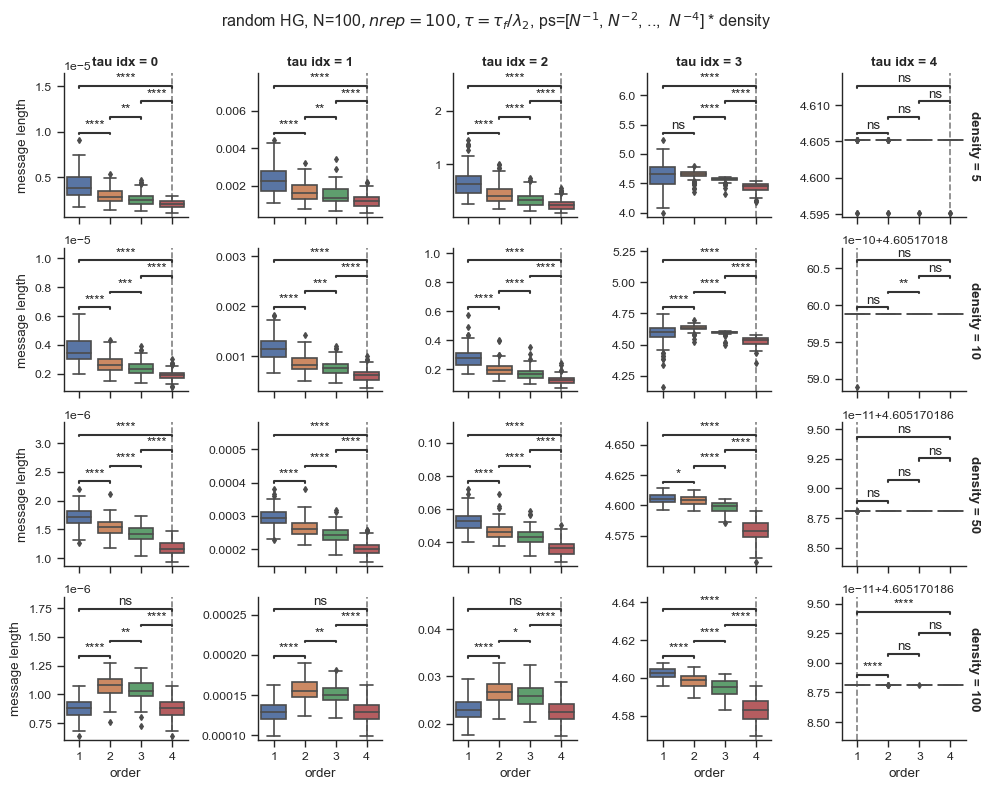

In [164]:
g = sb.catplot(
    kind="box",
    data=df,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df["tau idx"] == i) * (df["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random HG, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RHG_N{N}_density_{density_scales}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [165]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RHG_N100_density_[5, 10, 50, 100]_nreps_100_boxplot'

## Random SC

In [327]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])  # wiring probas
density_scales = [20, 50, 100]

n_rep = 100

rescale = True

In [328]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        # print(density * ps)
        H = xgi.random_simplicial_complex(N, density * ps)
        # print(H)
        xgi.write_edgelist(H, f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [06:39<00:00,  4.00s/it]


In [329]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        H = xgi.read_edgelist(f"../data/RSC_N_{N}_density_{density}_{i}.edgelist")
        Hs_i.append(H)
    Hs[density] = Hs_i

100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.32it/s]


In [330]:
Hs.keys()

dict_keys([20, 50, 100])

In [331]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():

    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        #inverse_rescaling_factors = [max(orders) / d for d in orders]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_N = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2
        tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)

        # tau_factors = np.array([0.01, 0.1, 1, 10])
        # taus = tau_factors * tau_c
        #taus = np.logspace(np.log10(0.01 * tau_N), np.log10(100 * tau_2), num=5)
        #taus = np.geomspace(tau_N, tau_2, num=4, endpoint=True)
        taus = generate_geomspace_points(tau_N, tau_2, 3, 1)
        print(np.array2string(taus, formatter={"float_kind": lambda x: "%.2e" % x}))

        for j, tau in enumerate(taus):

            # tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
                sparse=False,
                sparse_Lap=False,
            )

            info_losses[density][i][j] = Ds_H
            complexities[density][i][j] = lZs_H
            orders_arr[density][i][j] = orders
            message_lengths[density][i][j] = Ds_H + lZs_H

labels = [f"{i}" for i in density_scales]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.41e-02 8.45e-02 2.96e-01 1.04e+00 3.65e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.40it/s]

  1%|▍                                          | 1/100 [00:01<01:54,  1.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.04e-02 7.81e-02 2.99e-01 1.14e+00 4.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.03it/s]

  2%|▊                                          | 2/100 [00:02<01:58,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.34e-02 8.11e-02 2.81e-01 9.71e-01 3.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.03it/s]

  3%|█▎                                         | 3/100 [00:03<01:59,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.13e-02 9.35e-02 4.12e-01 1.81e+00 7.97e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.85it/s]

  4%|█▋                                         | 4/100 [00:04<01:54,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.25e-02 9.92e-02 3.03e-01 9.27e-01 2.83e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.46it/s]

  5%|██▏                                        | 5/100 [00:05<01:53,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.30e-02 8.52e-02 3.15e-01 1.16e+00 4.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.95it/s]

  6%|██▌                                        | 6/100 [00:07<01:58,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.09e-02 7.52e-02 2.71e-01 9.78e-01 3.52e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.33it/s]

  7%|███                                        | 7/100 [00:08<02:01,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.10e-02 7.91e-02 2.97e-01 1.12e+00 4.20e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.07it/s]

  8%|███▍                                       | 8/100 [00:09<01:56,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.48e-02 9.63e-02 2.67e-01 7.39e-01 2.05e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.02it/s]

  9%|███▊                                       | 9/100 [00:11<01:53,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.20e-02 1.00e-01 3.13e-01 9.80e-01 3.06e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.13it/s]

 10%|████▏                                     | 10/100 [00:12<01:50,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.53e-02 1.00e-01 2.85e-01 8.11e-01 2.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.57it/s]

 11%|████▌                                     | 11/100 [00:13<01:51,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.77e-02 6.87e-02 2.66e-01 1.03e+00 4.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.85it/s]

 12%|█████                                     | 12/100 [00:14<01:49,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.11e-02 9.50e-02 2.90e-01 8.84e-01 2.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.80it/s]

 13%|█████▍                                    | 13/100 [00:16<01:49,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.05e-02 7.46e-02 2.71e-01 9.83e-01 3.57e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.97it/s]

 14%|█████▉                                    | 14/100 [00:17<01:47,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.27e-02 9.31e-02 2.65e-01 7.56e-01 2.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.17it/s]

 15%|██████▎                                   | 15/100 [00:18<01:46,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.05e-02 6.96e-02 2.36e-01 8.03e-01 2.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.81it/s]

 16%|██████▋                                   | 16/100 [00:19<01:43,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.14e-02 9.13e-02 2.65e-01 7.70e-01 2.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.77it/s]

 17%|███████▏                                  | 17/100 [00:21<01:44,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.53e-02 1.00e-01 2.85e-01 8.08e-01 2.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.88it/s]

 18%|███████▌                                  | 18/100 [00:22<01:48,  1.32s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.92e-02 1.02e-01 2.63e-01 6.80e-01 1.76e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.54it/s]

 19%|███████▉                                  | 19/100 [00:23<01:46,  1.32s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.83e-02 8.66e-02 2.65e-01 8.13e-01 2.49e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.95it/s]

 20%|████████▍                                 | 20/100 [00:25<01:44,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.52e-02 8.88e-02 3.13e-01 1.11e+00 3.90e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.63it/s]

 21%|████████▊                                 | 21/100 [00:26<01:42,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.05e-02 9.71e-02 3.09e-01 9.84e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.49it/s]

 22%|█████████▏                                | 22/100 [00:27<01:42,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.67e-02 8.98e-02 3.02e-01 1.02e+00 3.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.33it/s]

 23%|█████████▋                                | 23/100 [00:29<01:39,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.05e-02 9.31e-02 2.84e-01 8.65e-01 2.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.54it/s]

 24%|██████████                                | 24/100 [00:30<01:37,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.36e-02 9.77e-02 2.84e-01 8.27e-01 2.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.39it/s]

 25%|██████████▌                               | 25/100 [00:31<01:36,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.94e-02 7.20e-02 2.67e-01 9.93e-01 3.68e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.00it/s]

 26%|██████████▉                               | 26/100 [00:32<01:35,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.12e-02 7.97e-02 2.99e-01 1.12e+00 4.22e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.60it/s]

 27%|███████████▎                              | 27/100 [00:34<01:31,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.55e-02 8.26e-02 2.68e-01 8.68e-01 2.81e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.79it/s]

 28%|███████████▊                              | 28/100 [00:35<01:31,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.00e-02 8.04e-02 3.22e-01 1.29e+00 5.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.79it/s]

 29%|████████████▏                             | 29/100 [00:36<01:28,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.84e-02 9.21e-02 2.99e-01 9.70e-01 3.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.55it/s]

 30%|████████████▌                             | 30/100 [00:37<01:26,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.89e-02 8.53e-02 2.51e-01 7.40e-01 2.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.01it/s]

 31%|█████████████                             | 31/100 [00:38<01:23,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.40e-02 9.91e-02 2.89e-01 8.43e-01 2.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.76it/s]

 32%|█████████████▍                            | 32/100 [00:40<01:21,  1.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.14e-02 9.26e-02 2.74e-01 8.08e-01 2.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.07it/s]

 33%|█████████████▊                            | 33/100 [00:41<01:23,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.55e-02 7.86e-02 2.42e-01 7.45e-01 2.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.18it/s]

 34%|██████████████▎                           | 34/100 [00:42<01:22,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.13e-02 7.17e-02 2.41e-01 8.09e-01 2.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.19it/s]

 35%|██████████████▋                           | 35/100 [00:44<01:21,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.39e-02 7.92e-02 2.63e-01 8.72e-01 2.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.16it/s]

 36%|███████████████                           | 36/100 [00:45<01:21,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 8.34e-02 2.52e-01 7.64e-01 2.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.01it/s]

 37%|███████████████▌                          | 37/100 [00:46<01:20,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.08e-02 9.47e-02 2.91e-01 8.94e-01 2.75e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.86it/s]

 38%|███████████████▉                          | 38/100 [00:47<01:17,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.24e-02 9.91e-02 3.03e-01 9.28e-01 2.84e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.10it/s]

 39%|████████████████▍                         | 39/100 [00:49<01:19,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.10e-02 7.26e-02 2.50e-01 8.64e-01 2.98e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.02it/s]

 40%|████████████████▊                         | 40/100 [00:50<01:16,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.58e-02 8.68e-02 2.92e-01 9.81e-01 3.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.12it/s]

 41%|█████████████████▏                        | 41/100 [00:51<01:15,  1.28s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.50e-02 8.73e-02 3.05e-01 1.07e+00 3.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.89it/s]

 42%|█████████████████▋                        | 42/100 [00:52<01:13,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.47e-02 1.08e-01 3.33e-01 1.03e+00 3.20e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.68it/s]

 43%|██████████████████                        | 43/100 [00:54<01:11,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.65e-02 1.06e-01 3.06e-01 8.87e-01 2.57e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.91it/s]

 44%|██████████████████▍                       | 44/100 [00:55<01:11,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.68e-02 6.54e-02 2.54e-01 9.87e-01 3.84e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.70it/s]

 45%|██████████████████▉                       | 45/100 [00:56<01:09,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.33e-02 8.04e-02 2.78e-01 9.60e-01 3.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.99it/s]

 46%|███████████████████▎                      | 46/100 [00:57<01:06,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.75e-02 9.26e-02 3.13e-01 1.05e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.73it/s]

 47%|███████████████████▋                      | 47/100 [00:59<01:06,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.72e-02 8.23e-02 2.49e-01 7.54e-01 2.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.39it/s]

 48%|████████████████████▏                     | 48/100 [01:00<01:04,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.16e-02 9.19e-02 2.67e-01 7.76e-01 2.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.78it/s]

 49%|████████████████████▌                     | 49/100 [01:01<01:03,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.88e-02 7.61e-02 3.09e-01 1.25e+00 5.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.31it/s]

 50%|█████████████████████                     | 50/100 [01:02<01:02,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.01e-02 7.41e-02 2.73e-01 1.01e+00 3.71e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.30it/s]

 51%|█████████████████████▍                    | 51/100 [01:04<01:00,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 8.47e-02 2.60e-01 8.00e-01 2.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.76it/s]

 52%|█████████████████████▊                    | 52/100 [01:05<01:01,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.59e-02 9.09e-02 3.20e-01 1.12e+00 3.95e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.15it/s]

 53%|██████████████████████▎                   | 53/100 [01:06<00:59,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.56e-02 8.90e-02 3.09e-01 1.07e+00 3.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.90it/s]

 54%|██████████████████████▋                   | 54/100 [01:08<00:59,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.28e-02 7.39e-02 2.40e-01 7.79e-01 2.53e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.88it/s]

 55%|███████████████████████                   | 55/100 [01:09<00:56,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.24e-02 9.97e-02 3.06e-01 9.42e-01 2.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.05it/s]

 56%|███████████████████████▌                  | 56/100 [01:10<00:56,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.68e-02 1.02e-01 2.83e-01 7.87e-01 2.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.74it/s]

 57%|███████████████████████▉                  | 57/100 [01:11<00:55,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.63e-02 8.69e-02 2.87e-01 9.48e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.09it/s]

 58%|████████████████████████▎                 | 58/100 [01:13<00:52,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.97e-02 1.00e-01 3.38e-01 1.14e+00 3.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.01it/s]

 59%|████████████████████████▊                 | 59/100 [01:14<00:51,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.57e-02 8.23e-02 2.63e-01 8.41e-01 2.69e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.86it/s]

 60%|█████████████████████████▏                | 60/100 [01:15<00:49,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.45e-02 8.93e-02 3.25e-01 1.18e+00 4.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.92it/s]

 61%|█████████████████████████▌                | 61/100 [01:16<00:47,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.51e-02 8.30e-02 2.74e-01 9.07e-01 3.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.11it/s]

 62%|██████████████████████████                | 62/100 [01:18<00:46,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.79e-02 9.06e-02 2.94e-01 9.52e-01 3.09e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.84it/s]

 63%|██████████████████████████▍               | 63/100 [01:19<00:45,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.47e-02 1.04e-01 3.15e-01 9.48e-01 2.86e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.69it/s]

 64%|██████████████████████████▉               | 64/100 [01:20<00:44,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.58e-02 8.38e-02 2.72e-01 8.85e-01 2.88e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.58it/s]

 65%|███████████████████████████▎              | 65/100 [01:21<00:43,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.95e-02 8.74e-02 2.59e-01 7.69e-01 2.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.73it/s]

 66%|███████████████████████████▋              | 66/100 [01:23<00:42,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.10e-02 1.09e-01 2.88e-01 7.62e-01 2.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.65it/s]

 67%|████████████████████████████▏             | 67/100 [01:24<00:41,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 9.99e-02 3.62e-01 1.31e+00 4.75e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.76it/s]

 68%|████████████████████████████▌             | 68/100 [01:25<00:38,  1.22s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.07e-02 9.46e-02 2.91e-01 8.98e-01 2.77e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.33it/s]

 69%|████████████████████████████▉             | 69/100 [01:26<00:37,  1.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.28e-02 8.11e-02 2.89e-01 1.03e+00 3.66e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.06it/s]

 70%|█████████████████████████████▍            | 70/100 [01:27<00:35,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.19e-02 8.47e-02 3.28e-01 1.27e+00 4.92e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.25it/s]

 71%|█████████████████████████████▊            | 71/100 [01:29<00:35,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.81e-02 8.54e-02 2.60e-01 7.89e-01 2.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.95it/s]

 72%|██████████████████████████████▏           | 72/100 [01:30<00:33,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.39e-02 1.13e-01 2.91e-01 7.49e-01 1.93e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.47it/s]

 73%|██████████████████████████████▋           | 73/100 [01:31<00:33,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.67e-02 8.50e-02 4.31e-01 2.19e+00 1.11e+01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.10it/s]

 74%|███████████████████████████████           | 74/100 [01:32<00:32,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.45e-02 9.76e-02 3.89e-01 1.55e+00 6.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.19it/s]

 75%|███████████████████████████████▌          | 75/100 [01:33<00:30,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.52e-02 8.50e-02 2.86e-01 9.64e-01 3.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.21it/s]

 76%|███████████████████████████████▉          | 76/100 [01:35<00:29,  1.21s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.37e-02 1.02e-01 3.07e-01 9.26e-01 2.79e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.41it/s]

 77%|████████████████████████████████▎         | 77/100 [01:36<00:28,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.97e-02 9.51e-02 3.05e-01 9.77e-01 3.13e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 34.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.17it/s]

 78%|████████████████████████████████▊         | 78/100 [01:37<00:26,  1.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.93e-02 7.34e-02 2.80e-01 1.07e+00 4.06e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.10it/s]

 79%|█████████████████████████████████▏        | 79/100 [01:38<00:24,  1.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[1.89e-02 7.26e-02 2.79e-01 1.07e+00 4.12e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.80it/s]

 80%|█████████████████████████████████▌        | 80/100 [01:40<00:25,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.50e-02 1.06e-01 3.20e-01 9.69e-01 2.93e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.79it/s]

 81%|██████████████████████████████████        | 81/100 [01:41<00:24,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.95e-02 9.99e-02 3.38e-01 1.14e+00 3.86e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.78it/s]

 82%|██████████████████████████████████▍       | 82/100 [01:42<00:23,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.19e-02 1.00e-01 3.13e-01 9.81e-01 3.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.87it/s]

 83%|██████████████████████████████████▊       | 83/100 [01:44<00:22,  1.31s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.63e-02 1.07e-01 3.14e-01 9.22e-01 2.71e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.49it/s]

 84%|███████████████████████████████████▎      | 84/100 [01:45<00:20,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.62e-02 8.85e-02 2.99e-01 1.01e+00 3.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.98it/s]

 85%|███████████████████████████████████▋      | 85/100 [01:46<00:18,  1.27s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.14e-02 7.91e-02 2.93e-01 1.08e+00 4.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.46it/s]

 86%|████████████████████████████████████      | 86/100 [01:47<00:17,  1.26s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.94e-02 8.90e-02 2.69e-01 8.16e-01 2.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.72it/s]

 87%|████████████████████████████████████▌     | 87/100 [01:49<00:16,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[4.21e-02 1.16e-01 3.20e-01 8.82e-01 2.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.50it/s]

 88%|████████████████████████████████████▉     | 88/100 [01:50<00:15,  1.29s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.03e-02 7.21e-02 2.56e-01 9.06e-01 3.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.82it/s]

 89%|█████████████████████████████████████▍    | 89/100 [01:51<00:14,  1.30s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.76e-02 9.30e-02 3.13e-01 1.06e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.80it/s]

 90%|█████████████████████████████████████▊    | 90/100 [01:52<00:12,  1.25s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.90e-02 8.95e-02 2.77e-01 8.54e-01 2.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.23it/s]

 91%|██████████████████████████████████████▏   | 91/100 [01:54<00:11,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.41e-02 9.09e-02 3.43e-01 1.30e+00 4.89e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.03it/s]

 92%|██████████████████████████████████████▋   | 92/100 [01:55<00:09,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.03e-02 8.42e-02 3.49e-01 1.45e+00 6.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.06it/s]

 93%|███████████████████████████████████████   | 93/100 [01:56<00:08,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.41e-02 8.41e-02 2.93e-01 1.02e+00 3.56e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.98it/s]

 94%|███████████████████████████████████████▍  | 94/100 [01:57<00:07,  1.24s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[2.40e-02 8.11e-02 2.74e-01 9.27e-01 3.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.37it/s]

 95%|███████████████████████████████████████▉  | 95/100 [01:59<00:06,  1.23s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.44e-02 9.90e-02 2.85e-01 8.21e-01 2.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.67it/s]

 96%|████████████████████████████████████████▎ | 96/100 [02:01<00:06,  1.55s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.09e-02 9.04e-02 2.65e-01 7.76e-01 2.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.01it/s]

 97%|████████████████████████████████████████▋ | 97/100 [02:02<00:04,  1.48s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.93e-02 9.49e-02 3.08e-01 9.97e-01 3.23e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.60it/s]

 98%|█████████████████████████████████████████▏| 98/100 [02:03<00:02,  1.42s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[2.68e-02 8.89e-02 2.95e-01 9.77e-01 3.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 25.14it/s]

 99%|█████████████████████████████████████████▌| 99/100 [02:05<00:01,  1.36s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Drop

[3.21e-02 9.86e-02 3.03e-01 9.33e-01 2.87e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.82it/s]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.92e-02 1.32e-01 2.95e-01 6.60e-01 1.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.90it/s]

  1%|▍                                          | 1/100 [00:02<03:30,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.39e-02 1.06e-01 2.57e-01 6.21e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.31it/s]

  2%|▊                                          | 2/100 [00:04<03:29,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.17e-02 1.51e-01 2.79e-01 5.17e-01 9.55e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.82it/s]

  3%|█▎                                         | 3/100 [00:06<03:29,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.91e-02 1.16e-01 2.73e-01 6.44e-01 1.52e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.09it/s]

  4%|█▋                                         | 4/100 [00:08<03:25,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.05e-02 1.14e-01 2.60e-01 5.89e-01 1.34e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.79it/s]

  5%|██▏                                        | 5/100 [00:10<03:18,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.33e-02 1.21e-01 2.74e-01 6.21e-01 1.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.03it/s]

  6%|██▌                                        | 6/100 [00:12<03:16,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.75e-02 1.20e-01 2.51e-01 5.26e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.38it/s]

  7%|███                                        | 7/100 [00:14<03:20,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.13e-02 1.14e-01 2.56e-01 5.71e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.73it/s]

  8%|███▍                                       | 8/100 [00:17<03:18,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.35e-02 1.27e-01 3.02e-01 7.16e-01 1.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.25it/s]

  9%|███▊                                       | 9/100 [00:19<03:15,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.29e-02 1.08e-01 2.73e-01 6.87e-01 1.73e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.08it/s]

 10%|████▏                                     | 10/100 [00:21<03:08,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.17e-02 1.18e-01 2.70e-01 6.16e-01 1.41e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.33it/s]

 11%|████▌                                     | 11/100 [00:23<03:03,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.70e-02 1.21e-01 2.59e-01 5.51e-01 1.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.54it/s]

 12%|█████                                     | 12/100 [00:25<03:01,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.74e-02 1.25e-01 2.71e-01 5.89e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

 13%|█████▍                                    | 13/100 [00:27<03:00,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.98e-02 1.25e-01 2.63e-01 5.50e-01 1.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.82it/s]

 14%|█████▉                                    | 14/100 [00:29<02:59,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.05e-02 1.19e-01 2.79e-01 6.56e-01 1.54e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

 15%|██████▎                                   | 15/100 [00:31<02:58,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.87e-02 1.11e-01 2.52e-01 5.74e-01 1.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.16it/s]

 16%|██████▋                                   | 16/100 [00:33<02:57,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.07e-02 1.38e-01 2.70e-01 5.28e-01 1.03e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.74it/s]

 17%|███████▏                                  | 17/100 [00:35<02:55,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[3.80e-02 9.73e-02 2.50e-01 6.40e-01 1.64e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.56it/s]

 18%|███████▌                                  | 18/100 [00:37<02:51,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.75e-02 1.24e-01 2.67e-01 5.74e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.64it/s]

 19%|███████▉                                  | 19/100 [00:40<02:50,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.88e-02 1.26e-01 2.72e-01 5.84e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.24it/s]

 20%|████████▍                                 | 20/100 [00:42<02:49,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.24e-02 1.02e-01 2.46e-01 5.94e-01 1.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.59it/s]

 21%|████████▊                                 | 21/100 [00:44<02:50,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.12e-02 1.27e-01 2.65e-01 5.52e-01 1.15e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.71it/s]

 22%|█████████▏                                | 22/100 [00:46<02:47,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.01e-02 1.17e-01 2.71e-01 6.32e-01 1.47e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.21it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

 23%|█████████▋                                | 23/100 [00:48<02:44,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.33e-02 1.03e-01 2.44e-01 5.81e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.43it/s]

 24%|██████████                                | 24/100 [00:50<02:43,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.32e-02 1.13e-01 2.42e-01 5.16e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.85it/s]

 25%|██████████▌                               | 25/100 [00:52<02:37,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.73e-02 1.30e-01 2.93e-01 6.64e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.66it/s]

 26%|██████████▉                               | 26/100 [00:55<02:38,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.43e-02 1.13e-01 2.87e-01 7.29e-01 1.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

 27%|███████████▎                              | 27/100 [00:57<02:32,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.82e-02 1.42e-01 2.94e-01 6.11e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.54it/s]

 28%|███████████▊                              | 28/100 [00:59<02:27,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.60e-02 1.12e-01 2.72e-01 6.62e-01 1.61e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.00it/s]

 29%|████████████▏                             | 29/100 [01:01<02:26,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.32e-02 1.26e-01 2.53e-01 5.05e-01 1.01e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.28it/s]

 30%|████████████▌                             | 30/100 [01:03<02:30,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.25e-02 1.25e-01 2.99e-01 7.12e-01 1.70e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.72it/s]

 31%|█████████████                             | 31/100 [01:05<02:30,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.78e-02 1.32e-01 3.03e-01 6.94e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.77it/s]

 32%|█████████████▍                            | 32/100 [01:07<02:23,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.47e-02 1.06e-01 2.52e-01 5.98e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

 33%|█████████████▊                            | 33/100 [01:09<02:19,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.59e-02 1.35e-01 2.77e-01 5.67e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.32it/s]

 34%|██████████████▎                           | 34/100 [01:12<02:23,  2.17s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.00e-02 1.26e-01 2.65e-01 5.56e-01 1.17e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.45it/s]

 35%|██████████████▋                           | 35/100 [01:14<02:19,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.24e-02 1.19e-01 2.69e-01 6.08e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.90it/s]

 36%|███████████████                           | 36/100 [01:16<02:18,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.83e-02 1.11e-01 2.56e-01 5.91e-01 1.36e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.65it/s]

 37%|███████████████▌                          | 37/100 [01:18<02:10,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.40e-02 1.04e-01 2.47e-01 5.86e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

 38%|███████████████▉                          | 38/100 [01:20<02:10,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.52e-02 1.21e-01 2.64e-01 5.76e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.09it/s]

 39%|████████████████▍                         | 39/100 [01:22<02:07,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.39e-02 1.29e-01 2.59e-01 5.22e-01 1.05e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

 40%|████████████████▊                         | 40/100 [01:24<02:07,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.30e-02 1.20e-01 2.73e-01 6.19e-01 1.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.98it/s]

 41%|█████████████████▏                        | 41/100 [01:26<02:04,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.52e-02 1.08e-01 2.57e-01 6.13e-01 1.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.17it/s]

 42%|█████████████████▋                        | 42/100 [01:28<02:00,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.89e-02 1.31e-01 2.89e-01 6.41e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 43%|██████████████████                        | 43/100 [01:30<01:57,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.94e-02 1.16e-01 2.72e-01 6.39e-01 1.50e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.31it/s]

 44%|██████████████████▍                       | 44/100 [01:33<01:57,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.03e-02 1.33e-01 2.93e-01 6.46e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.38it/s]

 45%|██████████████████▉                       | 45/100 [01:35<01:54,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.68e-02 1.29e-01 2.93e-01 6.65e-01 1.51e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.26it/s]

 46%|███████████████████▎                      | 46/100 [01:37<01:53,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.33e-02 1.01e-01 2.35e-01 5.49e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

 47%|███████████████████▋                      | 47/100 [01:39<01:51,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.32e-02 1.07e-01 2.66e-01 6.58e-01 1.63e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

 48%|████████████████████▏                     | 48/100 [01:41<01:48,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.36e-02 1.00e-01 2.31e-01 5.33e-01 1.23e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.94it/s]

 49%|████████████████████▌                     | 49/100 [01:43<01:44,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.15e-02 1.32e-01 2.85e-01 6.15e-01 1.33e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.41it/s]

 50%|█████████████████████                     | 50/100 [01:45<01:44,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.14e-02 1.30e-01 2.76e-01 5.86e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.87it/s]

 51%|█████████████████████▍                    | 51/100 [01:47<01:41,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.21e-02 1.25e-01 3.00e-01 7.19e-01 1.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.84it/s]

 52%|█████████████████████▊                    | 52/100 [01:49<01:39,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.77e-02 1.19e-01 2.97e-01 7.43e-01 1.85e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 53%|██████████████████████▎                   | 53/100 [01:51<01:36,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.13e-02 1.23e-01 2.97e-01 7.13e-01 1.72e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.19it/s]

 54%|██████████████████████▋                   | 54/100 [01:53<01:34,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.75e-02 1.05e-01 2.33e-01 5.15e-01 1.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.80it/s]

 55%|███████████████████████                   | 55/100 [01:55<01:32,  2.05s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.36e-02 1.07e-01 2.63e-01 6.46e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.13it/s]

 56%|███████████████████████▌                  | 56/100 [01:57<01:30,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.43e-02 1.28e-01 2.56e-01 5.10e-01 1.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.76it/s]

 57%|███████████████████████▉                  | 57/100 [01:59<01:29,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.22e-02 1.16e-01 2.59e-01 5.77e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.61it/s]

 58%|████████████████████████▎                 | 58/100 [02:02<01:28,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.72e-02 1.12e-01 2.65e-01 6.27e-01 1.48e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.71it/s]

 59%|████████████████████████▊                 | 59/100 [02:04<01:27,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.34e-02 1.18e-01 2.63e-01 5.83e-01 1.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.95it/s]

 60%|█████████████████████████▏                | 60/100 [02:06<01:23,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.28e-02 1.21e-01 2.77e-01 6.36e-01 1.46e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.85it/s]

 61%|█████████████████████████▌                | 61/100 [02:08<01:22,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.39e-02 1.03e-01 2.43e-01 5.72e-01 1.35e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

 62%|██████████████████████████                | 62/100 [02:10<01:19,  2.09s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.53e-02 1.31e-01 2.65e-01 5.33e-01 1.07e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.15it/s]

 63%|██████████████████████████▍               | 63/100 [02:12<01:19,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.15e-02 1.26e-01 2.60e-01 5.34e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.97it/s]

 64%|██████████████████████████▉               | 64/100 [02:14<01:17,  2.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.77e-02 1.23e-01 2.62e-01 5.60e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.83it/s]

 65%|███████████████████████████▎              | 65/100 [02:17<01:15,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.63e-02 1.08e-01 2.52e-01 5.89e-01 1.38e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]

 66%|███████████████████████████▋              | 66/100 [02:19<01:12,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.93e-02 1.09e-01 2.42e-01 5.36e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.39it/s]

 67%|████████████████████████████▏             | 67/100 [02:21<01:10,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.58e-02 1.38e-01 2.90e-01 6.10e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 68%|████████████████████████████▌             | 68/100 [02:23<01:08,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.15e-02 1.19e-01 2.73e-01 6.28e-01 1.44e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.57it/s]

 69%|████████████████████████████▉             | 69/100 [02:25<01:05,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.27e-02 1.03e-01 2.47e-01 5.93e-01 1.42e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.56it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.45it/s]

 70%|█████████████████████████████▍            | 70/100 [02:27<01:01,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.12e-02 1.00e-01 2.43e-01 5.90e-01 1.43e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.63it/s]

 71%|█████████████████████████████▊            | 71/100 [02:29<01:01,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.04e-02 1.00e-01 2.49e-01 6.17e-01 1.53e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.50it/s]

 72%|██████████████████████████████▏           | 72/100 [02:31<00:59,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.93e-02 1.30e-01 2.87e-01 6.31e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

 73%|██████████████████████████████▋           | 73/100 [02:33<00:56,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.09e-02 1.15e-01 2.59e-01 5.85e-01 1.32e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.31it/s]

 74%|███████████████████████████████           | 74/100 [02:35<00:54,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.56e-02 1.30e-01 3.03e-01 7.08e-01 1.65e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]

 75%|███████████████████████████████▌          | 75/100 [02:38<00:54,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.87e-02 1.46e-01 2.72e-01 5.06e-01 9.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.66it/s]

 76%|███████████████████████████████▉          | 76/100 [02:40<00:52,  2.19s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.58e-02 1.22e-01 2.66e-01 5.82e-01 1.27e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.47it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.30it/s]

 77%|████████████████████████████████▎         | 77/100 [02:42<00:49,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.75e-02 1.07e-01 2.43e-01 5.49e-01 1.24e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.17it/s]

 78%|████████████████████████████████▊         | 78/100 [02:44<00:46,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.39e-02 1.24e-01 2.83e-01 6.49e-01 1.49e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 79%|█████████████████████████████████▏        | 79/100 [02:46<00:43,  2.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.78e-02 1.24e-01 2.65e-01 5.67e-01 1.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.13it/s]

 80%|█████████████████████████████████▌        | 80/100 [02:48<00:41,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.17e-02 1.15e-01 2.58e-01 5.75e-01 1.28e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 81%|██████████████████████████████████        | 81/100 [02:50<00:39,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.08e-02 1.33e-01 2.92e-01 6.40e-01 1.40e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.05it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.95it/s]

 82%|██████████████████████████████████▍       | 82/100 [02:52<00:37,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.32e-02 1.34e-01 2.85e-01 6.06e-01 1.29e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.29it/s]

 83%|██████████████████████████████████▊       | 83/100 [02:54<00:35,  2.07s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.91e-02 1.17e-01 2.79e-01 6.65e-01 1.59e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.29it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

 84%|███████████████████████████████████▎      | 84/100 [02:56<00:33,  2.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.16e-02 1.37e-01 3.05e-01 6.78e-01 1.51e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.93it/s]

 85%|███████████████████████████████████▋      | 85/100 [02:59<00:31,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.86e-02 1.08e-01 2.40e-01 5.34e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 86%|████████████████████████████████████      | 86/100 [03:01<00:29,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.44e-02 1.18e-01 2.56e-01 5.56e-01 1.21e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

 87%|████████████████████████████████████▌     | 87/100 [03:03<00:27,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.67e-02 1.26e-01 2.81e-01 6.25e-01 1.39e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.40it/s]

 88%|████████████████████████████████████▉     | 88/100 [03:05<00:25,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.11e-02 1.30e-01 2.77e-01 5.91e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.01it/s]

 89%|█████████████████████████████████████▍    | 89/100 [03:07<00:23,  2.14s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.66e-02 1.06e-01 2.42e-01 5.53e-01 1.26e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.04it/s]

 90%|█████████████████████████████████████▊    | 90/100 [03:10<00:22,  2.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.28e-02 1.34e-01 2.87e-01 6.14e-01 1.31e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.00it/s]

 91%|██████████████████████████████████████▏   | 91/100 [03:12<00:19,  2.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.92e-02 1.12e-01 2.53e-01 5.74e-01 1.30e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.17it/s]

 92%|██████████████████████████████████████▋   | 92/100 [03:14<00:17,  2.18s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.01e-02 1.11e-01 2.45e-01 5.40e-01 1.19e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.74it/s]

 93%|███████████████████████████████████████   | 93/100 [03:16<00:15,  2.15s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[4.89e-02 1.10e-01 2.47e-01 5.56e-01 1.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

 94%|███████████████████████████████████████▍  | 94/100 [03:18<00:12,  2.13s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.74e-02 1.21e-01 2.56e-01 5.40e-01 1.14e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

 95%|███████████████████████████████████████▉  | 95/100 [03:20<00:10,  2.12s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.54e-02 1.35e-01 2.78e-01 5.72e-01 1.18e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.46it/s]

 96%|████████████████████████████████████████▎ | 96/100 [03:22<00:08,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.26e-02 1.16e-01 2.56e-01 5.66e-01 1.25e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.09it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.94it/s]

 97%|████████████████████████████████████████▋ | 97/100 [03:24<00:06,  2.11s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.16e-02 1.12e-01 2.45e-01 5.34e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.38it/s]

 98%|█████████████████████████████████████████▏| 98/100 [03:26<00:04,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.39e-02 1.13e-01 2.35e-01 4.92e-01 1.03e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.44it/s]

 99%|█████████████████████████████████████████▌| 99/100 [03:28<00:02,  2.10s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[5.67e-02 1.19e-01 2.50e-01 5.24e-01 1.10e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.56it/s]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[7.82e-02 1.35e-01 2.32e-01 4.00e-01 6.88e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

  1%|▍                                          | 1/100 [00:03<04:57,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.78e-02 1.43e-01 2.64e-01 4.85e-01 8.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.45it/s]

  2%|▊                                          | 2/100 [00:05<04:53,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.52e-01 2.72e-01 4.86e-01 8.69e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

  3%|█▎                                         | 3/100 [00:09<04:51,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.89e-02 1.43e-01 2.58e-01 4.67e-01 8.44e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

  4%|█▋                                         | 4/100 [00:11<04:47,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.58e-02 1.52e-01 2.43e-01 3.86e-01 6.15e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

  5%|██▏                                        | 5/100 [00:14<04:41,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.26e-02 1.37e-01 2.58e-01 4.87e-01 9.18e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

  6%|██▌                                        | 6/100 [00:17<04:40,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.90e-02 1.44e-01 2.63e-01 4.79e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

  7%|███                                        | 7/100 [00:20<04:39,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.53e-02 1.57e-01 2.57e-01 4.23e-01 6.95e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

  8%|███▍                                       | 8/100 [00:23<04:33,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.26e-02 1.59e-01 2.71e-01 4.65e-01 7.96e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

  9%|███▊                                       | 9/100 [00:26<04:32,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.49e-02 1.21e-01 2.24e-01 4.17e-01 7.76e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

 10%|████▏                                     | 10/100 [00:29<04:28,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.52e-02 1.25e-01 2.38e-01 4.56e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.90it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

 11%|████▌                                     | 11/100 [00:32<04:18,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.58e-02 1.45e-01 2.78e-01 5.32e-01 1.02e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

 12%|█████                                     | 12/100 [00:35<04:15,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.46e-02 1.47e-01 2.57e-01 4.47e-01 7.79e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

 13%|█████▍                                    | 13/100 [00:38<04:12,  2.91s/it]

[9.36e-02 1.54e-01 2.54e-01 4.19e-01 6.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.71it/s]

 14%|█████▉                                    | 14/100 [00:41<04:12,  2.94s/it]

[9.38e-02 1.57e-01 2.63e-01 4.40e-01 7.37e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.85it/s]

 15%|██████▎                                   | 15/100 [00:44<04:11,  2.96s/it]

[7.94e-02 1.41e-01 2.51e-01 4.47e-01 7.95e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

 16%|██████▋                                   | 16/100 [00:47<04:12,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.01e-02 1.55e-01 2.68e-01 4.63e-01 7.98e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.55it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.09it/s]

 17%|███████▏                                  | 17/100 [00:50<04:05,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.20e-02 1.54e-01 2.58e-01 4.33e-01 7.26e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.81it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.48it/s]

 18%|███████▌                                  | 18/100 [00:53<04:03,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.43e-02 1.47e-01 2.57e-01 4.49e-01 7.84e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.51it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.47it/s]

 19%|███████▉                                  | 19/100 [00:56<03:59,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.27e-02 1.51e-01 2.76e-01 5.04e-01 9.20e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.61it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.24it/s]

 20%|████████▍                                 | 20/100 [00:58<03:50,  2.88s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.06e-02 1.32e-01 2.48e-01 4.65e-01 8.72e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

 21%|████████▊                                 | 21/100 [01:01<03:50,  2.91s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.75e-02 1.50e-01 2.57e-01 4.40e-01 7.54e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

 22%|█████████▏                                | 22/100 [01:04<03:48,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.46e-01 2.51e-01 4.32e-01 7.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

 23%|█████████▋                                | 23/100 [01:07<03:44,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.90e-02 1.56e-01 2.73e-01 4.79e-01 8.39e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.10it/s]

 24%|██████████                                | 24/100 [01:10<03:39,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.45e-02 1.38e-01 2.57e-01 4.77e-01 8.86e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.33it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

 25%|██████████▌                               | 25/100 [01:13<03:38,  2.92s/it]

[1.02e-01 1.61e-01 2.54e-01 4.02e-01 6.35e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

 26%|██████████▉                               | 26/100 [01:17<03:56,  3.20s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.04e-02 1.35e-01 2.58e-01 4.94e-01 9.46e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.24it/s]

 27%|███████████▎                              | 27/100 [01:20<03:50,  3.16s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.04e-02 1.48e-01 2.72e-01 5.00e-01 9.19e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.38it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

 28%|███████████▊                              | 28/100 [01:23<03:41,  3.08s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.47e-01 2.52e-01 4.33e-01 7.45e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 29%|████████████▏                             | 29/100 [01:26<03:34,  3.02s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.23e-02 1.46e-01 2.58e-01 4.57e-01 8.09e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

 30%|████████████▌                             | 30/100 [01:29<03:29,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.38e-02 1.34e-01 2.44e-01 4.43e-01 8.04e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

 31%|█████████████                             | 31/100 [01:32<03:26,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.03e-02 1.51e-01 2.54e-01 4.25e-01 7.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.16it/s]

 32%|█████████████▍                            | 32/100 [01:35<03:22,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.39e-02 1.51e-01 2.73e-01 4.94e-01 8.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.87it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

 33%|█████████████▊                            | 33/100 [01:38<03:18,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.36e-02 1.47e-01 2.60e-01 4.58e-01 8.07e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

 34%|██████████████▎                           | 34/100 [01:41<03:16,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.90e-02 1.48e-01 2.47e-01 4.10e-01 6.83e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.16it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.62it/s]

 35%|██████████████▋                           | 35/100 [01:44<03:12,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.80e-02 1.56e-01 2.76e-01 4.89e-01 8.65e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.37it/s]

 36%|███████████████                           | 36/100 [01:47<03:11,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.69e-02 1.59e-01 2.62e-01 4.31e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.02it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

 37%|███████████████▌                          | 37/100 [01:50<03:10,  3.03s/it]

[9.36e-02 1.55e-01 2.58e-01 4.28e-01 7.11e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.69it/s]

 38%|███████████████▉                          | 38/100 [01:53<03:07,  3.02s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.30e-02 1.31e-01 2.35e-01 4.20e-01 7.53e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.20it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.03it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

 39%|████████████████▍                         | 39/100 [01:56<03:02,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.64e-02 1.52e-01 2.69e-01 4.75e-01 8.38e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.62it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

 40%|████████████████▊                         | 40/100 [01:59<03:00,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.60e-02 1.58e-01 2.92e-01 5.37e-01 9.89e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.77it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.00it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

 41%|█████████████████▏                        | 41/100 [02:02<02:55,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.97e-02 1.34e-01 2.58e-01 4.97e-01 9.57e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

 42%|█████████████████▋                        | 42/100 [02:05<02:51,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.64e-02 1.29e-01 2.50e-01 4.86e-01 9.45e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.21it/s]

 43%|██████████████████                        | 43/100 [02:07<02:47,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.55e-02 1.59e-01 2.66e-01 4.44e-01 7.41e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.93it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

 44%|██████████████████▍                       | 44/100 [02:10<02:43,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.45e-02 1.50e-01 2.66e-01 4.71e-01 8.36e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

 45%|██████████████████▉                       | 45/100 [02:13<02:43,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.47e-02 1.28e-01 2.55e-01 5.06e-01 1.00e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.63it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.68it/s]

 46%|███████████████████▎                      | 46/100 [02:16<02:38,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.59e-02 1.56e-01 2.84e-01 5.17e-01 9.41e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.96it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.70it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.28it/s]

 47%|███████████████████▋                      | 47/100 [02:19<02:35,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.30e-02 1.59e-01 2.71e-01 4.62e-01 7.88e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.07it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

 48%|████████████████████▏                     | 48/100 [02:22<02:31,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.51e-02 1.35e-01 2.44e-01 4.40e-01 7.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.14it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.99it/s]

 49%|████████████████████▌                     | 49/100 [02:25<02:28,  2.92s/it]

[1.07e-01 1.69e-01 2.68e-01 4.26e-01 6.76e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.14it/s]

 50%|█████████████████████                     | 50/100 [02:28<02:27,  2.95s/it]

[9.20e-02 1.53e-01 2.55e-01 4.25e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

 51%|█████████████████████▍                    | 51/100 [02:31<02:27,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.75e-02 1.49e-01 2.53e-01 4.30e-01 7.31e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

 52%|█████████████████████▊                    | 52/100 [02:34<02:24,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[1.02e-01 1.64e-01 2.64e-01 4.24e-01 6.83e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.68it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.30it/s]

 53%|██████████████████████▎                   | 53/100 [02:37<02:19,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.60e-02 1.53e-01 2.73e-01 4.87e-01 8.67e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.07it/s]

 54%|██████████████████████▋                   | 54/100 [02:40<02:16,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.62e-02 1.52e-01 2.67e-01 4.71e-01 8.30e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.52it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

 55%|███████████████████████                   | 55/100 [02:43<02:14,  2.99s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.44e-01 2.45e-01 4.15e-01 7.04e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

 56%|███████████████████████▌                  | 56/100 [02:46<02:12,  3.01s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.02e-02 1.51e-01 2.52e-01 4.20e-01 7.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.12it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.08it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

 57%|███████████████████████▉                  | 57/100 [02:49<02:07,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.09e-02 1.52e-01 2.55e-01 4.27e-01 7.16e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.13it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.58it/s]

 58%|████████████████████████▎                 | 58/100 [02:52<02:04,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.36e-02 1.52e-01 2.76e-01 5.02e-01 9.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

 59%|████████████████████████▊                 | 59/100 [02:55<02:01,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.74e-02 1.50e-01 2.57e-01 4.41e-01 7.56e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.48it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

 60%|█████████████████████████▏                | 60/100 [02:58<01:59,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.31e-02 1.45e-01 2.53e-01 4.41e-01 7.69e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.32it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

 61%|█████████████████████████▌                | 61/100 [03:01<01:54,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.95e-02 1.53e-01 2.61e-01 4.45e-01 7.60e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.36it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.61it/s]

 62%|██████████████████████████                | 62/100 [03:04<01:51,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.85e-02 1.53e-01 2.65e-01 4.58e-01 7.91e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.94it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 63%|██████████████████████████▍               | 63/100 [03:07<01:48,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.70e-02 1.35e-01 2.74e-01 5.55e-01 1.12e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.45it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.18it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.65it/s]

 64%|██████████████████████████▉               | 64/100 [03:10<01:45,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.70e-02 1.51e-01 2.61e-01 4.51e-01 7.82e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]

 65%|███████████████████████████▎              | 65/100 [03:13<01:43,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.92e-02 1.40e-01 2.48e-01 4.39e-01 7.77e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.23it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

 66%|███████████████████████████▋              | 66/100 [03:15<01:39,  2.94s/it]

[8.85e-02 1.49e-01 2.51e-01 4.22e-01 7.11e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.85it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.69it/s]

 67%|████████████████████████████▏             | 67/100 [03:18<01:37,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.82e-02 1.58e-01 2.83e-01 5.07e-01 9.09e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.65it/s]

 68%|████████████████████████████▌             | 68/100 [03:22<01:35,  2.98s/it]

[9.23e-02 1.53e-01 2.54e-01 4.22e-01 6.99e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.10it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.33it/s]

 69%|████████████████████████████▉             | 69/100 [03:25<01:32,  3.00s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.66e-02 1.51e-01 2.64e-01 4.60e-01 8.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.97it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.57it/s]

 70%|█████████████████████████████▍            | 70/100 [03:27<01:29,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.76e-02 1.52e-01 2.66e-01 4.63e-01 8.06e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.22it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.78it/s]

 71%|█████████████████████████████▊            | 71/100 [03:30<01:25,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.04e-02 1.56e-01 2.69e-01 4.63e-01 7.99e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.57it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.86it/s]

 72%|██████████████████████████████▏           | 72/100 [03:33<01:20,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.74e-02 1.48e-01 2.51e-01 4.26e-01 7.21e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]

 73%|██████████████████████████████▋           | 73/100 [03:36<01:17,  2.87s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.69e-02 1.56e-01 2.81e-01 5.04e-01 9.06e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.13it/s]

 74%|███████████████████████████████           | 74/100 [03:39<01:15,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.57e-02 1.35e-01 2.76e-01 5.64e-01 1.16e+00]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

 75%|███████████████████████████████▌          | 75/100 [03:42<01:12,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.60e-02 1.57e-01 2.55e-01 4.17e-01 6.80e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.26it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

 76%|███████████████████████████████▉          | 76/100 [03:45<01:10,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.60e-02 1.44e-01 2.73e-01 5.18e-01 9.82e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.15it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.67it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]

 77%|████████████████████████████████▎         | 77/100 [03:48<01:07,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.23e-02 1.50e-01 2.72e-01 4.94e-01 8.97e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.84it/s]

 78%|████████████████████████████████▊         | 78/100 [03:51<01:03,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.52e-02 1.51e-01 2.69e-01 4.78e-01 8.49e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.17it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

 79%|█████████████████████████████████▏        | 79/100 [03:53<01:00,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.41e-02 1.25e-01 2.43e-01 4.74e-01 9.24e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.99it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.54it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.75it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.26it/s]

 80%|█████████████████████████████████▌        | 80/100 [03:56<00:58,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.99e-02 1.42e-01 2.52e-01 4.47e-01 7.93e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.82it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]

 81%|██████████████████████████████████        | 81/100 [03:59<00:55,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.62e-02 1.51e-01 2.66e-01 4.67e-01 8.20e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.04it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.02it/s]

 82%|██████████████████████████████████▍       | 82/100 [04:02<00:52,  2.89s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.92e-02 1.64e-01 2.71e-01 4.49e-01 7.43e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.30it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]

 83%|██████████████████████████████████▊       | 83/100 [04:05<00:48,  2.88s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.82e-02 1.49e-01 2.52e-01 4.27e-01 7.23e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.86it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.08it/s]

 84%|███████████████████████████████████▎      | 84/100 [04:08<00:47,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.55e-02 1.27e-01 2.48e-01 4.81e-01 9.36e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.35it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.91it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.41it/s]

 85%|███████████████████████████████████▋      | 85/100 [04:11<00:44,  2.94s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.85e-02 1.55e-01 2.71e-01 4.73e-01 8.27e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.66it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.46it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.37it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.43it/s]

 86%|████████████████████████████████████      | 86/100 [04:14<00:40,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.57e-02 1.61e-01 2.70e-01 4.53e-01 7.60e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.44it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.69it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.53it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.96it/s]

 87%|████████████████████████████████████▌     | 87/100 [04:17<00:38,  2.96s/it]

[6.99e-02 1.31e-01 2.46e-01 4.62e-01 8.67e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.76it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.73it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.43it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.96it/s]

 88%|████████████████████████████████████▉     | 88/100 [04:20<00:35,  2.96s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[6.54e-02 1.27e-01 2.47e-01 4.80e-01 9.32e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.98it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.25it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.44it/s]

 89%|█████████████████████████████████████▍    | 89/100 [04:23<00:31,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.33e-02 1.44e-01 2.49e-01 4.30e-01 7.43e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.58it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.24it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

 90%|█████████████████████████████████████▊    | 90/100 [04:25<00:28,  2.84s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.93e-02 1.50e-01 2.51e-01 4.22e-01 7.08e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.72it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.64it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.06it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.78it/s]

 91%|██████████████████████████████████████▏   | 91/100 [04:28<00:26,  2.92s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.77e-02 1.62e-01 2.69e-01 4.47e-01 7.42e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.31it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.59it/s]

 92%|██████████████████████████████████████▋   | 92/100 [04:32<00:23,  2.97s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.93e-02 1.51e-01 2.55e-01 4.30e-01 7.25e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.89it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.11it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.34it/s]

 93%|███████████████████████████████████████   | 93/100 [04:35<00:20,  2.98s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.40e-02 1.59e-01 2.68e-01 4.53e-01 7.64e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.88it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.79it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.06it/s]

 94%|███████████████████████████████████████▍  | 94/100 [04:37<00:17,  2.95s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[7.73e-02 1.39e-01 2.50e-01 4.48e-01 8.05e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.28it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.74it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.23it/s]

 95%|███████████████████████████████████████▉  | 95/100 [04:40<00:14,  2.90s/it]

[9.92e-02 1.60e-01 2.58e-01 4.16e-01 6.70e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.60it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.35it/s]

 96%|████████████████████████████████████████▎ | 96/100 [04:43<00:11,  2.93s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.54e-02 1.52e-01 2.42e-01 3.87e-01 6.16e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.71it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.84it/s]

 97%|████████████████████████████████████████▋ | 97/100 [04:46<00:08,  2.90s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[8.69e-02 1.52e-01 2.66e-01 4.65e-01 8.13e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.95it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.19it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.27it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.12it/s]

 98%|█████████████████████████████████████████▏| 98/100 [04:49<00:05,  2.91s/it]

[1.01e-01 1.58e-01 2.47e-01 3.86e-01 6.02e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.41it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.40it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.49it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.33it/s]

 99%|█████████████████████████████████████████▌| 99/100 [04:52<00:03,  3.06s/it]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(


[9.37e-02 1.58e-01 2.65e-01 4.47e-01 7.52e-01]



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.92it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.65it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.83it/s]

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.26it/s]

100%|█████████████████████████████████████████| 100/100 [04:57<00:00,  2.97s/it]


In [332]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_SC = pd.DataFrame(
    long_form_data, columns=["message length", "density", "rep", "tau idx", "order"]
)

df_SC

,message length,density,rep,tau idx,order
0,0.001345,20,0,0,1
1,0.001059,20,0,0,2
2,0.001029,20,0,0,3
3,0.001525,20,0,0,4
4,0.015099,20,0,1,1
...,...,...,...,...,...
5995,0.123736,100,99,3,4
5996,0.526263,100,99,4,1
5997,0.457869,100,99,4,2
5998,0.421047,100,99,4,3


In [333]:
df_SC.density.unique()

array([ 20,  50, 100])

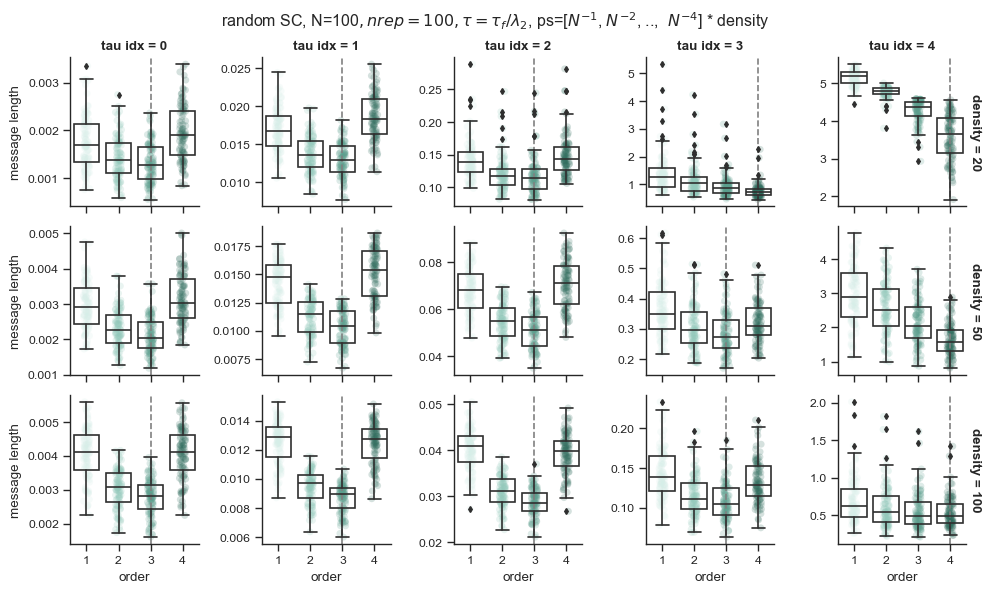

In [335]:
g = sb.catplot(
    kind="box",
    data=df_SC,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_SC["tau idx"] == i) * (df_SC["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df_SC[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        #annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RSC_N{N}_density_{density_scales}_nreps_{n_rep}_boxplot"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

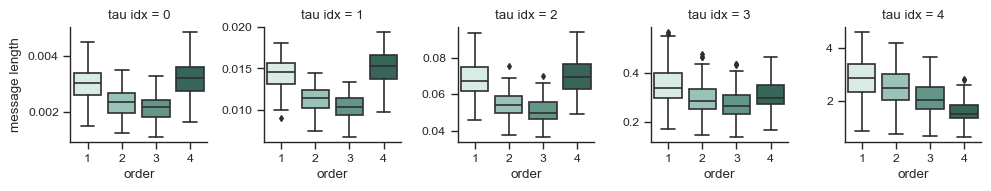

In [148]:
mask = df_SC["density"] == 50

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

plt.show()

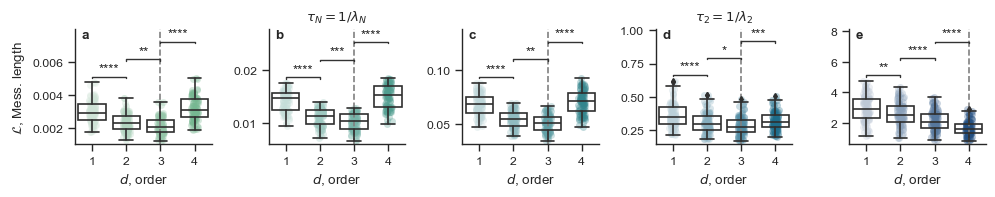

In [398]:
dens = 50

mask = df_SC["density"] == dens

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC[mask],
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.3,
)


# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)] # (1, 4)

for i, tau in enumerate(taus):
    #for j, density in enumerate(density_scales):

    ax = g.axes.ravel()[i]
    mask = (df_SC["tau idx"] == i) * (df_SC["density"] == dens)

    annotator = Annotator(
        ax,
        pairs,
        data=df_SC[mask],
        y="message length",
        x="order",
        #row="density",
        col="tau idx",
    )
    annotator.configure(
        test="t-test_welch", text_format="star", loc="inside", verbose=0, line_width=1
    )
    annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)
    
    ax.set_xlabel("$d$, order")

g.axes[0, 0].set_title(r"", weight="bold")
g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
g.axes[0, 2].set_title(r"", weight="bold")
g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
g.axes[0, 4].set_title(r"", weight="bold")

g.axes[0, 0].set_ylabel(r"$\mathcal{L}$, Mess. length")

# change colors
palette_div = sb.color_palette("crest", n_colors=5)

for i, ax in enumerate(g.axes.ravel()):

    #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
    palette2 = sb.light_palette(palette_div[i], n_colors=5)
    
    for j in range(4):
        ax.collections[j].set_facecolor(palette2[j+1])


fig.set_size_inches((7, 2))

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig_name = f"message_length_RSC_N{N}_vs_tau_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [175]:
palette2 = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
#sb.set_palette(palette)
palette2

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

In [285]:
palette2 = sb.cubehelix_palette(start=2.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=False)
#sb.set_palette(palette)
palette2

[[0.8386983947564264, 0.9327680019013955, 0.9092552908655802],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.1864737742223481, 0.42817540482404803, 0.36776204954698094]]

In [190]:
for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

In [298]:
palette_div = sb.color_palette("blend:g,b", n_colors=5)
palette_div

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.32447520184544404, 0.605674740484429, 0.47870818915801616),
 (0.31561707035755476, 0.5525259515570934, 0.5495732410611303),
 (0.3067589388696655, 0.49937716262975784, 0.6204382929642445),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]

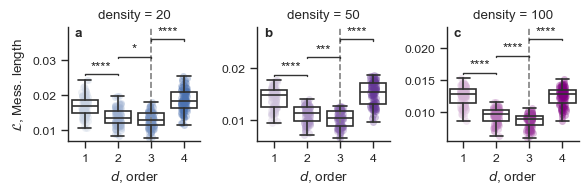

In [399]:
tau_idx = 1

mask = df_SC["tau idx"] == tau_idx

g = sb.catplot(
    kind="box",
    data=df_SC[mask],
    x="order",
    y="message length",
    #row="density",
    col="density",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC[mask],
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.3,
)


# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)] # (1, 4)

for i, dens in enumerate(density_scales):
    #for j, density in enumerate(density_scales):

    ax = g.axes.ravel()[i]
    mask = (df_SC["tau idx"] == tau_idx) * (df_SC["density"] == dens)

    annotator = Annotator(
        ax,
        pairs,
        data=df_SC[mask],
        y="message length",
        x="order",
        #row="density",
        col="density",
    )
    annotator.configure(
        test="t-test_welch", text_format="star", loc="inside", verbose=0, line_width=1
    )
    annotator.apply_and_annotate()

    # plot vertical line at minimum
    order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2)
    
    ax.set_xlabel("$d$, order")

#g.axes[0, 0].set_title(r"", weight="bold")
#g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
#g.axes[0, 2].set_title(r"", weight="bold")
#g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
#g.axes[0, 4].set_title(r"", weight="bold")

g.axes[0, 0].set_ylabel(r"$\mathcal{L}$, Mess. length")

# change colors
palette_div = sb.color_palette("blend:b,purple", n_colors=3)

for i, ax in enumerate(g.axes.ravel()):

    #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
    palette2 = sb.light_palette(palette_div[i], n_colors=5)
    
    for j in range(4):
        ax.collections[j].set_facecolor(palette2[j+1])


fig.set_size_inches((7, 2))

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig_name = f"message_length_RSC_N{N}_vs_densities_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

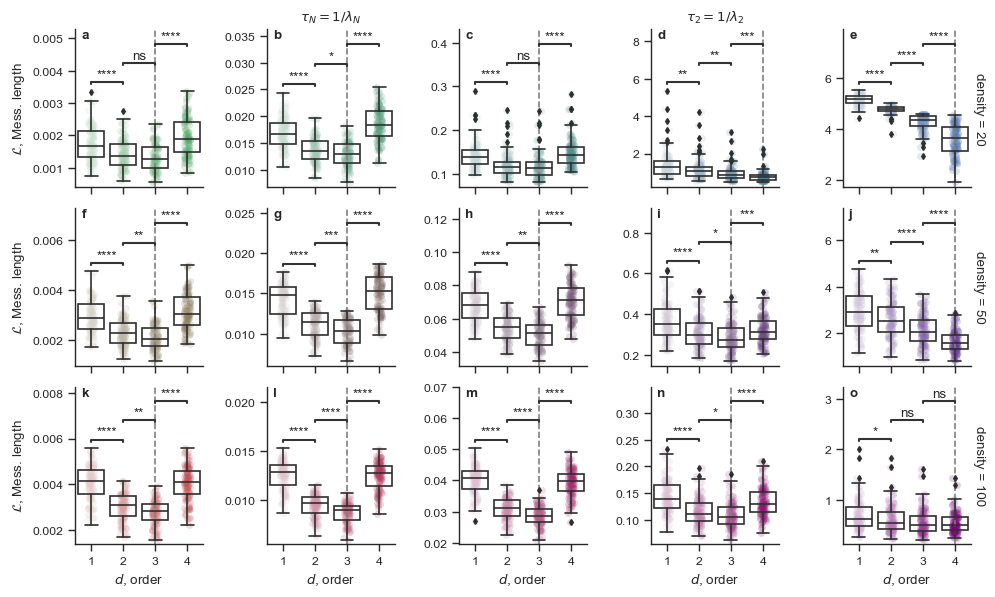

In [400]:
g = sb.catplot(
    kind="box",
    data=df_SC,
    x="order",
    y="message length",
    row="density",
    col="tau idx",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)


for ax in g.axes.ravel():
    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map_dataframe(
    sb.stripplot,
    data=df_SC,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    # col="kind",
    # row="density",
    # col="tau",
    # color="black",
    # dodge=True,
    alpha=0.2,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (2, 3), (3, 4)]

for i, tau in enumerate(taus):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_SC["tau idx"] == i) * (df_SC["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df_SC[mask],
            y="message length",
            x="order",
            row="density",
            col="tau idx",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)
        
for ax in g.axes[-1, :]:
    ax.set_xlabel("$d$, order")

g.axes[0, 0].set_title(r"", weight="bold")
g.axes[0, 1].set_title(r"$\tau_N = 1 / \lambda_N$", weight="bold")
g.axes[0, 2].set_title(r"", weight="bold")
g.axes[0, 3].set_title(r"$\tau_2 = 1 / \lambda_2$", weight="bold")
g.axes[0, 4].set_title(r"", weight="bold")

for ax in g.axes[:, 0]:
    ax.set_ylabel(r"$\mathcal{L}$, Mess. length")
        
# vertical color map
palette_div_vertical = sb.blend_palette(["g", "r"], n_colors=len(density_scales))
palette_div_vertical2 = sb.blend_palette(["b", "purple"], n_colors=len(density_scales))

for i in range(len(density_scales)):
    
    palette_div_horizontal = sb.blend_palette([palette_div_vertical[i], palette_div_vertical2[i]], n_colors=len(taus))

    for j in range(len(taus)):
        
        ax = g.axes[i,j]

        #palette2 = sb.cubehelix_palette(start=2.3 + i*0.3, rot=0., dark=0.35, light=0.9, as_cmap=False, n_colors=5, reverse=False)
        palette2 = sb.light_palette(palette_div_horizontal[j], n_colors=4+1)

        for kk in range(4):
            ax.collections[kk].set_facecolor(palette2[kk+1])

#g.set_titles(template="{col_name}", fontweight="bold")
#g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
#title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
#g.fig.suptitle(title)

import string
#string.ascii_lowercase
for i, ax in enumerate(g.axes.ravel()):
    ax.text(0.05, 1, string.ascii_lowercase[i], transform=ax.transAxes, weight="bold", ha="left", va="top")


fig.set_size_inches((7, 6))


fig_name = f"message_length_RSC_N{N}_density_vs_tau_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [351]:
palette2

[(0.9504834469363553, 0.9420125579225501, 0.9373186873041832),
 (0.9006571862812326, 0.8315681912128843, 0.7648142086897687),
 (0.8508309256261098, 0.7211238245032185, 0.592309730075354),
 (0.801004664970987, 0.6106794577935528, 0.4198052514609394),
 (0.7519569396386006, 0.5019607843137255, 0.24999615532487507)]

In [343]:
palette_div_vertical

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.41797770088427527, 0.32811995386389853, 0.4550865051903114),
 (0.5019607843137255, 0.0, 0.5019607843137255)]

In [344]:
palette_div_horizontal

[(0.5019607843137255, 0.0, 0.5019607843137255),
 (0.626958861976163, 0.25098039215686274, 0.3759784698193003),
 (0.7519569396386006, 0.5019607843137255, 0.24999615532487507),
 (0.8769550173010381, 0.7529411764705882, 0.1240138408304498),
 (1.0, 1.0, 0.0)]

In [350]:
sb.blend_palette([palette_div_vertical[0], "yellow"], n_colors=len(taus))

[(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.5006535947712418, 0.7444521337946943, 0.30548250672818145),
 (0.6679738562091504, 0.830080738177624, 0.20312187620146097),
 (0.835294117647059, 0.9157093425605536, 0.10076124567474048),
 (1.0, 1.0, 0.0)]

In [325]:
palette[2]

[0.3552744615776239, 0.6200435958444379, 0.5538645149046753]

In [ ]:
#01796F

In [97]:
import numpy as np

# Define the number of desired points (excluding 1 and 1000)
num_points_between = 3
start = 1
end = 10

# Generate points between 1 and 1000
points_between = np.geomspace(start, end, num=num_points_between)

# Compute the logarithmic distance between consecutive points
log_distance = np.log10(points_between[1]) - np.log10(points_between[0])


# Extend the array by adding a value before 1 and after 1000
# so that all final 5 values are separated by the same log distance
final_array = np.concatenate(([points_between[0] / (10 ** log_distance)], points_between, [end * (10 ** log_distance)]))

print("Final array:", final_array)


Final array: [ 0.31622777  1.          3.16227766 10.         31.6227766 ]


In [138]:
import numpy as np


def generate_geomspace_points(
    start_value, end_value, num_points_between, num_points_before_after
):
    """
    Generate an array of points evenly spaced on a logarithmic scale between two specified values.

    Parameters
    ----------
    start_value : float
        The starting value of the range.
    end_value : float
        The ending value of the range.
    num_points_between : int
        The number of points to generate between start_value and end_value.
    num_points_before_after : int
        The total number of points to add before and after the specified range.

    Returns
    -------
    numpy.ndarray
        An array containing points evenly spaced on a logarithmic scale.

    Examples
    --------
    >>> generate_geomspace_points(1, 1000, 4, 1)
    array([   0.1,    1. ,   10. ,  100. , 1000. , 10000. ])
    """

    # Generate points between start and end values
    points_between = np.geomspace(start_value, end_value, num=num_points_between)

    # Compute the logarithmic distance between consecutive points
    log_distance = np.log10(points_between[1]) - np.log10(points_between[0])

    # Split num_points_before_after into points before and after
    num_points_before = num_points_before_after
    num_points_after = num_points_before_after

    # Extend the array by adding points before and after
    points_before = np.geomspace(
        start_value / (10 ** (num_points_before * log_distance)),
        start_value,
        num=num_points_before,
        endpoint=False,
    )
    points_after = np.geomspace(
        end_value * (10**log_distance),
        end_value * (10 ** (num_points_after * log_distance)),
        num=num_points_after,
    )

    # Concatenate all points
    final_array = np.concatenate((points_before, points_between, points_after))

    return final_array


# Example usage
start_value = 1
end_value = 1000
num_points_between = 4
num_points_before_after = 2

result = generate_geomspace_points(
    start_value, end_value, num_points_between, num_points_before_after
)
print("Final array:", result)

Final array: [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [137]:
generate_geomspace_points(1, 1000, 4, 1)

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [131]:
np.geomspace(1, 1000, 4)

array([   1.,   10.,  100., 1000.])

In [119]:
np.log10(result)

array([-1.5,  0. ,  1.5,  3. ,  4.5])

In [113]:
points_before

NameError: name 'points_before' is not defined

In [100]:
np.log10(final_array)

array([-0.5,  0. ,  0.5,  1. ,  1.5])

In [144]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSC_N100_density_[5, 10, 50, 100]_nreps_100_boxplot'

In [179]:
xgi.density(H0, order=4, ignore_singletons=True)

1.0227458681066928e-06

## Figure S2: From RSC to RHG: shuffling

In [66]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4])
density = 50
p_shuffles = np.linspace(0, 1, 3)

n_rep = 100
rescale = True

H0 = xgi.random_simplicial_complex(N, ps=density * ps)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Hs = dict()
for p in p_shuffles:
    Hs_i = []
    for rep in tqdm(range(n_rep)):
        if p == 0:
            Hs_i.append(H0)
        else:
            H = shuffle_hyperedges(S=H0, order=1, p=p)
            H = shuffle_hyperedges(S=H, order=2, p=p)
            H = shuffle_hyperedges(S=H, order=3, p=p)
            H = shuffle_hyperedges(S=H, order=4, p=p)
            Hs_i.append(H)
    Hs[p] = Hs_i

100%|█████████████████████████████████████████| 100/100 [01:16<00:00,  1.30it/s]


In [69]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for p, Hs_i in Hs.items():

    info_losses[p] = dict()
    complexities[p] = dict()
    orders_arr[p] = dict()
    message_lengths[p] = dict()

    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []

    for i, H0 in enumerate(tqdm(Hs_i)):

        info_losses[p][i] = dict()
        complexities[p][i] = dict()
        orders_arr[p][i] = dict()
        message_lengths[p][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
        # tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        # Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

        tau_c = find_charact_tau(
            H0, orders, weights, rescale_per_node=rescale, idx=-1
        )  # 1 / lambda2

        tau_factors = np.array([1])
        taus = tau_factors * tau_c

        for j, tau in enumerate(taus):

            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(
                H0,
                tau,
                rescaling_factors=inverse_rescaling_factors,
                rescale_per_node=rescale,
                sparse=False,
                sparse_Lap=False,
            )

            info_losses[p][i][tau_factor] = Ds_H
            complexities[p][i][tau_factor] = lZs_H
            orders_arr[p][i][tau_factor] = orders
            message_lengths[p][i][tau_factor] = Ds_H + lZs_H

labels = [f"{i}" for i in p_shuffles]

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:36,  2.70it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  2%|▊                                          | 2/100 [00:00<00:39,  2.45it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  3%|█▎                                         | 3/100 [00:01<00:45,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 33%|█████████████▊                            | 33/100 [00:14<00:31,  2.14it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 34%|██████████████▎                           | 34/100 [00:15<00:29,  2.21it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 35%|██████████████▋                           | 35/100 [00:15<00:30,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 36%|███████████████                           | 36/100 [00:16<00:29,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

 66%|███████████████████████████▋              | 66/100 [00:29<00:14,  2.28it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 67%|████████████████████████████▏             | 67/100 [00:30<00:14,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 68%|████████████████████████████▌             | 68/100 [00:30<00:14,  2.19it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 69%|████████████████████████████▉             | 69/100 [00:31<00:14,  2.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 98%|█████████████████████████████████████████▏| 98/100 [00:44<00:00,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 99%|█████████████████████████████████████████▌| 99/100 [00:44<00:00,  2.18it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

  1%|▍                                          | 1/100 [00:00<00:48,  2.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 14%|█████▉                                    | 14/100 [00:06<00:40,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 15%|██████▎                                   | 15/100 [00:07<00:40,  2.12it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 16%|██████▋                                   | 16/100 [00:07<00:40,  2.07it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 17%|███████▏                                  | 17/100 [00:08<00:40,  2.05it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

 46%|███████████████████▎                      | 46/100 [00:21<00:25,  2.16it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 47%|███████████████████▋                      | 47/100 [00:22<00:25,  2.10it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 48%|████████████████████▏                     | 48/100 [00:22<00:24,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 49%|████████████████████▌                     | 49/100 [00:22<00:23,  2.13it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 78%|████████████████████████████████▊         | 78/100 [00:36<00:10,  2.11it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 79%|█████████████████████████████████▏        | 79/100 [00:37<00:09,  2.12it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 80%|█████████████████████████████████▌        | 80/100 [00:37<00:09,  2.15it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 81%|██████████████████████████████████        | 81/100 [00:37<00:08,  2.17it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 10%|████▏                                     | 10/100 [00:04<00:39,  2.27it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 11%|████▌                                     | 11/100 [00:05<00:39,  2.26it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 12%|█████                                     | 12/100 [00:05<00:40,  2.19it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 13%|█████▍                                    | 13/100 [00:06<00:38,  2.29it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 42%|█████████████████▋                        | 42/100 [00:19<00:26,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 43%|██████████████████                        | 43/100 [00:19<00:25,  2.25it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 44%|██████████████████▍                       | 44/100 [00:20<00:24,  2.25it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 45%|██████████████████▉                       | 45/100 [00:20<00:24,  2.22it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning

 74%|███████████████████████████████           | 74/100 [00:34<00:12,  2.00it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 75%|███████████████████████████████▌          | 75/100 [00:34<00:12,  2.00it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 76%|███████████████████████████████▉          | 76/100 [00:35<00:11,  2.04it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 77%|████████████████████████████████▎         | 77/100 [00:35<00:11,  2.03it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning


 91%|██████████████████████████████████████▏   | 91/100 [00:41<00:04,  2.20it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 92%|██████████████████████████████████████▋   | 92/100 [00:42<00:03,  2.27it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 93%|███████████████████████████████████████   | 93/100 [00:42<00:03,  2.23it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(

 94%|███████████████████████████████████████▍  | 94/100 [00:43<00:02,  2.28it/s]/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarnin

In [70]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    # print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append(
                    [value, label1, label2, round(label3, 3), index + 1]
                )

# Create a DataFrame from the long_form_data list
df_shuffle = pd.DataFrame(
    long_form_data, columns=["message length", "p_shuffle", "rep", "tau fact.", "order"]
)

df_shuffle

,message length,p_shuffle,rep,tau fact.,order
0,0.017639,0.0,0,1,1
1,0.013526,0.0,0,1,2
2,0.011723,0.0,0,1,3
3,0.018299,0.0,0,1,4
4,0.017639,0.0,1,1,1
...,...,...,...,...,...
1195,0.012676,1.0,98,1,4
1196,0.021821,1.0,99,1,1
1197,0.016557,1.0,99,1,2
1198,0.015632,1.0,99,1,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


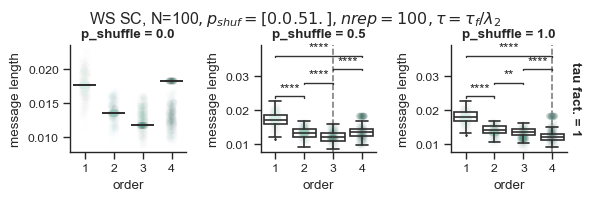

In [121]:
g = sb.catplot(
    kind="box",
    data=df_shuffle,
    x="order",
    y="message length",
    col="p_shuffle",
    row="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=1,
    #color="k",
)

for ax in g.axes.ravel():
    for patch in ax.patches:
#for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

g.map(
    sb.stripplot,
    data=df_shuffle,
    x="order",
    y="message length",
    hue="order",
    palette=palette,
    zorder=-2,
    #col="kind",
    # row="density",
    # col="tau",
    #color="black",
    # dodge=True,
    alpha=0.2,
)

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    
    for j, p in enumerate(p_shuffles):
        if j==0:
            continue
        ax = g.axes[i, j]
        mask = (df_shuffle["tau fact."] == tau_fact) * (df_shuffle["p_shuffle"] == p)

        annotator = Annotator(
            ax,
            pairs,
            data=df_shuffle[mask],
            y="message length",
            x="order",
            row="p_shuffle",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_ind",
            text_format="star",
            loc="inside",
            verbose=0,
            comparisons_correction="Bonferroni",
            line_width=1,
        )
        annotator.apply_and_annotate()

        # plot vertical line at minimum
        order_min = df_shuffle[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight="bold")
g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
title = (
    rf"WS SC, N={N}$, p_{{shuf}}={p_shuffles}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
)
g.fig.suptitle(title)

fig_name = f"message_length_RSCshuffle_N{N}_pshuff_{p_shuffles}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [107]:
p_shuffles

array([0. , 0.5, 1. ])

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


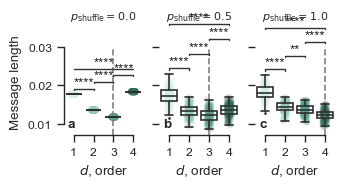

In [211]:
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(3.5, 1.4))

for i, ax in enumerate(axs):

    mask = df_shuffle["p_shuffle"] == p_shuffles[i]

    sb.boxplot(data=df_shuffle[mask], x="order", y="message length", fliersize=1, ax=ax)

    sb.stripplot(
        data=df_shuffle[mask],
        x="order",
        y="message length",
        ax=ax,
        zorder=-2,
        alpha=0.2,
    )

    if i != 0:
        ax.set_ylabel("")

    for patch in ax.patches:
        # for patch in ax.patches:
        red, green, blue, a = patch.get_facecolor()
        patch.set_facecolor((red, green, blue, 0))

    ax.set_title(rf"$p_{{\rm shuffle}} = {p_shuffles[i]}$", fontsize="small")
    ax.set_xlabel("$d$, order")

    # plot vertical line at minimum
    order_min = df_shuffle[mask].groupby("order").mean()["message length"].argmin()
    ax.axvline(order_min, ls="--", c="grey", zorder=-2, ymax=0.8)

    pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]
    annotator = Annotator(
        ax,
        pairs,
        data=df_shuffle[mask],
        y="message length",
        x="order",
        col="kind",
    )
    annotator.configure(
        test="t-test_ind",
        text_format="star",
        loc="outside",
        verbose=0,
        comparisons_correction="Bonferroni",
        line_width=1,
        #line_height=0,
        line_offset=0.2,
        text_offset=0,
        line_offset_to_group=0.1
    )
    annotator.apply_and_annotate()
    
    ax.set_yticks([0.01, 0.02, 0.03])
    ax.set_ylim([0.007, 0.035])
    if i!=0:
        ax.set_yticklabels([])
    

axs[0].text(
    0.05, 0.05, "a", transform=axs[0].transAxes, weight="bold", ha="left", va="bottom"
)
axs[1].text(
    0.05, 0.05, "b", transform=axs[1].transAxes, weight="bold", ha="left", va="bottom"
)
axs[2].text(
    0.05, 0.05, "c", transform=axs[2].transAxes, weight="bold", ha="left", va="bottom"
)

axs[0].set_ylabel("Message length")
sb.despine(trim=True, bottom=False)
sb.despine(trim=True, bottom=False, left=True, ax=axs[1])
sb.despine(trim=True, bottom=False, left=True, ax=axs[2])
#plt.subplots_adjust(wspace=0.4)

fig_name = f"figure_2_shuffle_stat"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [213]:
mins = dict()

for psh, message_length_p in message_lengths.items():
    #for message_length_p
    
    res = []
    
    for rep, message_length_p_rep in message_length_p.items():
        message_length_p_rep = message_length_p_rep[1]
        d_min = np.argmin(message_length_p_rep)
        res.append(d_min)
        
    mins[psh] = res


In [225]:
np.unique(mins[0], return_counts=True)

(array([2]), array([100]))

In [223]:
np.unique(mins[0.5], return_counts=True)

(array([2, 3]), array([95,  5]))

In [224]:
np.unique(mins[1], return_counts=True)

(array([2, 3]), array([ 7, 93]))

In [197]:
message_lengths[0]

{0: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 1: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 2: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 3: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 4: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 5: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 6: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 7: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 8: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 9: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 10: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 11: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 12: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 13: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 14: {1: array([0.01763915, 0.01352604, 0.011723  , 0.01829934])},
 15: 

In [35]:
df_shuffle.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSCshuffle_N100_pshuff_[0.   0.25 0.5  0.75 1.  ]_taufact_[0.1, 1.0]_nreps_100_boxplot'